# 1. Problem Statement
With the growth of e-commerce websites, people and financial companies rely on online services
to carry out their transactions that have led to an exponential increase in the credit card frauds
1. Fraudulent credit card transactions lead to a loss of huge amount of money. The design of an effective fraud detection system is necessary in order to reduce the losses incurred by the customers and financial companies
2. Research has been done on many models and methods to
prevent and detect credit card frauds. Some credit card fraud transaction datasets contain the problem of imbalance in datasets. A good fraud detection system should be able to identify the fraud transaction accurately and should make the detection possible in real-time transactions.

## Data Dictionary<br>
trans_date_trans_time -> Transaction time stamp<br>
cc_num -> Credit card number<br>
merchant -> merchant name<br>
category -> transaction category<br>
amt -> Transaction amount<br>
first -> First name of card holder<br>
last -> Last name of card holder<br>
gender -> Sex of card holder<br>
street -> transaction address<br>
city -> transaction city<br>
state -> transaction state<br>
zip -> transaction zipcode<br>
lat -> transaction lattitude<br>
long -> transaction longitude<br>
city_pop -> Population of the city<br>
job -> job of the card holder<br>
dob -> date of birth of card holder<br>
trans_num -> transaction number of transaction<br>
unix_time -> time in unix format<br>
merch_lat -> lattitude of the merchant<br>
merch_long -> longitude of merchant<br>
is_fraud -> nature of transaction (fraud or not fraud)<br>

## Our Goals:
1. Gain insights into the distribution of the limited data provided to us.
2. Create a sub-dataframe with a balanced 50/50 ratio of "Fraud" and "Non-Fraud" transactions using the NearMiss Algorithm.
3. Select appropriate classifiers and assess their accuracy to determine which one performs better.

### 1. Import libraries

In [3]:
# Data preprocessing libraries
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
from tqdm import tqdm

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# Model
from scipy.stats import skew
import yellowbrick
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Config
mpl.rcParams['font.family'] = 'monospace'
sns.set_theme(style="white", palette=None)
plotly.offline.init_notebook_mode()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [1]:
%matplotlib inline

# Data preprocessing

In [9]:
# Reading csv files and drop the first column
fraud = pd.read_csv(r"../content/fraudTest.csv")


fraud_test = pd.read_csv(r"../content/fraudTrain.csv")


# First view 10 rows
fraud.head(10)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   
5           5   2020-06-21 12:15:37    30407675418785   
6           6   2020-06-21 12:15:44   213180742685905   
7           7   2020-06-21 12:15:50  3589289942931264   
8           8   2020-06-21 12:16:10  3596357274378601   
9           9   2020-06-21 12:16:11  3546897637165774   

                               merchant        category     amt     first  \
0                 fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                  fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
3                     fraud_Haley Group        misc_pos   60.05     Brian   
4                 fraud_Johnston-Casper          travel    3.19    Nathan   
5                   fraud_Daugherty LLC       kids_pets   19.55  Danielle   
6                   fraud_Romaguera Ltd  health_fitness  133.93     Kayla   
7                     fraud_Reichel LLC   personal_care   10.37     Paula   
8     fraud_Goyette, Howell and Collier    shopping_pos    4.37     David   
9                   fraud_Kilback Group     food_dining   66.54     Kayla   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
5     Evans      F   76752 David Lodge Apt. 064  ...  42.1939  -76.7361   
6    Sutton      F              010 Weaver Land  ...  40.5070 -123.9743   
7   Estrada      F              350 Stacy Glens  ...  43.7557  -97.5936   
8   Everett      M              4138 David Fall  ...  41.0001  -78.2357   
9    Obrien      F   7921 Robert Port Suite 343  ...  31.6591  -96.8094   

   city_pop                                    job         dob  \
0    333497                    Mechanical engineer  1968-03-19   
1       302                 Sales professional, IT  1990-01-17   
2     34496                      Librarian, public  1970-10-21   
3     54767                           Set designer  1987-07-25   
4      1126                     Furniture designer  1955-07-06   
5       520                        Psychotherapist  1991-10-13   
6      1139                Therapist, occupational  1951-01-15   
7       343  Development worker, international aid  1972-03-05   
8      3688                          Advice worker  1973-05-27   
9       263                              Barrister  1956-05-30   

                          trans_num     unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
5  798db04aaceb4febd084f1a7c404da93  1.371817e+09  41.747157  -77.584197   
6  17003d7ce534440eadb10c4750e020e5  1.371817e+09  41.499458 -124.888729   
7  8be473af4f05fc6146ea55ace73e7ca2  1.371817e+09  44.495498  -97.728453   
8  71a1da150d1ce510193d7622e08e784e  1.371817e+09  41.546067  -78.120238   
9  a7915132c7c4240996ba03a47f81e3bd  1.371817e+09  31.782919  -96.366185   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
6       0.0  
7       0.0  
8       0.0

In [10]:
fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Exploratory Data Analysis
1. Univariate Analysis
2. Bivariate Analysis
3. Data Cleaning
4. Outlier Treatment
5. Variable Transformation

In [11]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11697 non-null  int64  
 1   trans_date_trans_time  11697 non-null  object 
 2   cc_num                 11697 non-null  int64  
 3   merchant               11697 non-null  object 
 4   category               11697 non-null  object 
 5   amt                    11697 non-null  float64
 6   first                  11697 non-null  object 
 7   last                   11697 non-null  object 
 8   gender                 11697 non-null  object 
 9   street                 11697 non-null  object 
 10  city                   11697 non-null  object 
 11  state                  11697 non-null  object 
 12  zip                    11697 non-null  int64  
 13  lat                    11697 non-null  float64
 14  long                   11697 non-null  float64
 15  ci

In [15]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353



*   70% data is present in the train dataset and remaining 30% in the test dataset.
*   No null values in either of the files




In [13]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

0.0    0.997521
1.0    0.002479
Name: is_fraud, dtype: float64

Fraud Distribution
0.0    0.997521
1.0    0.002479
Name: is_fraud, dtype: float64


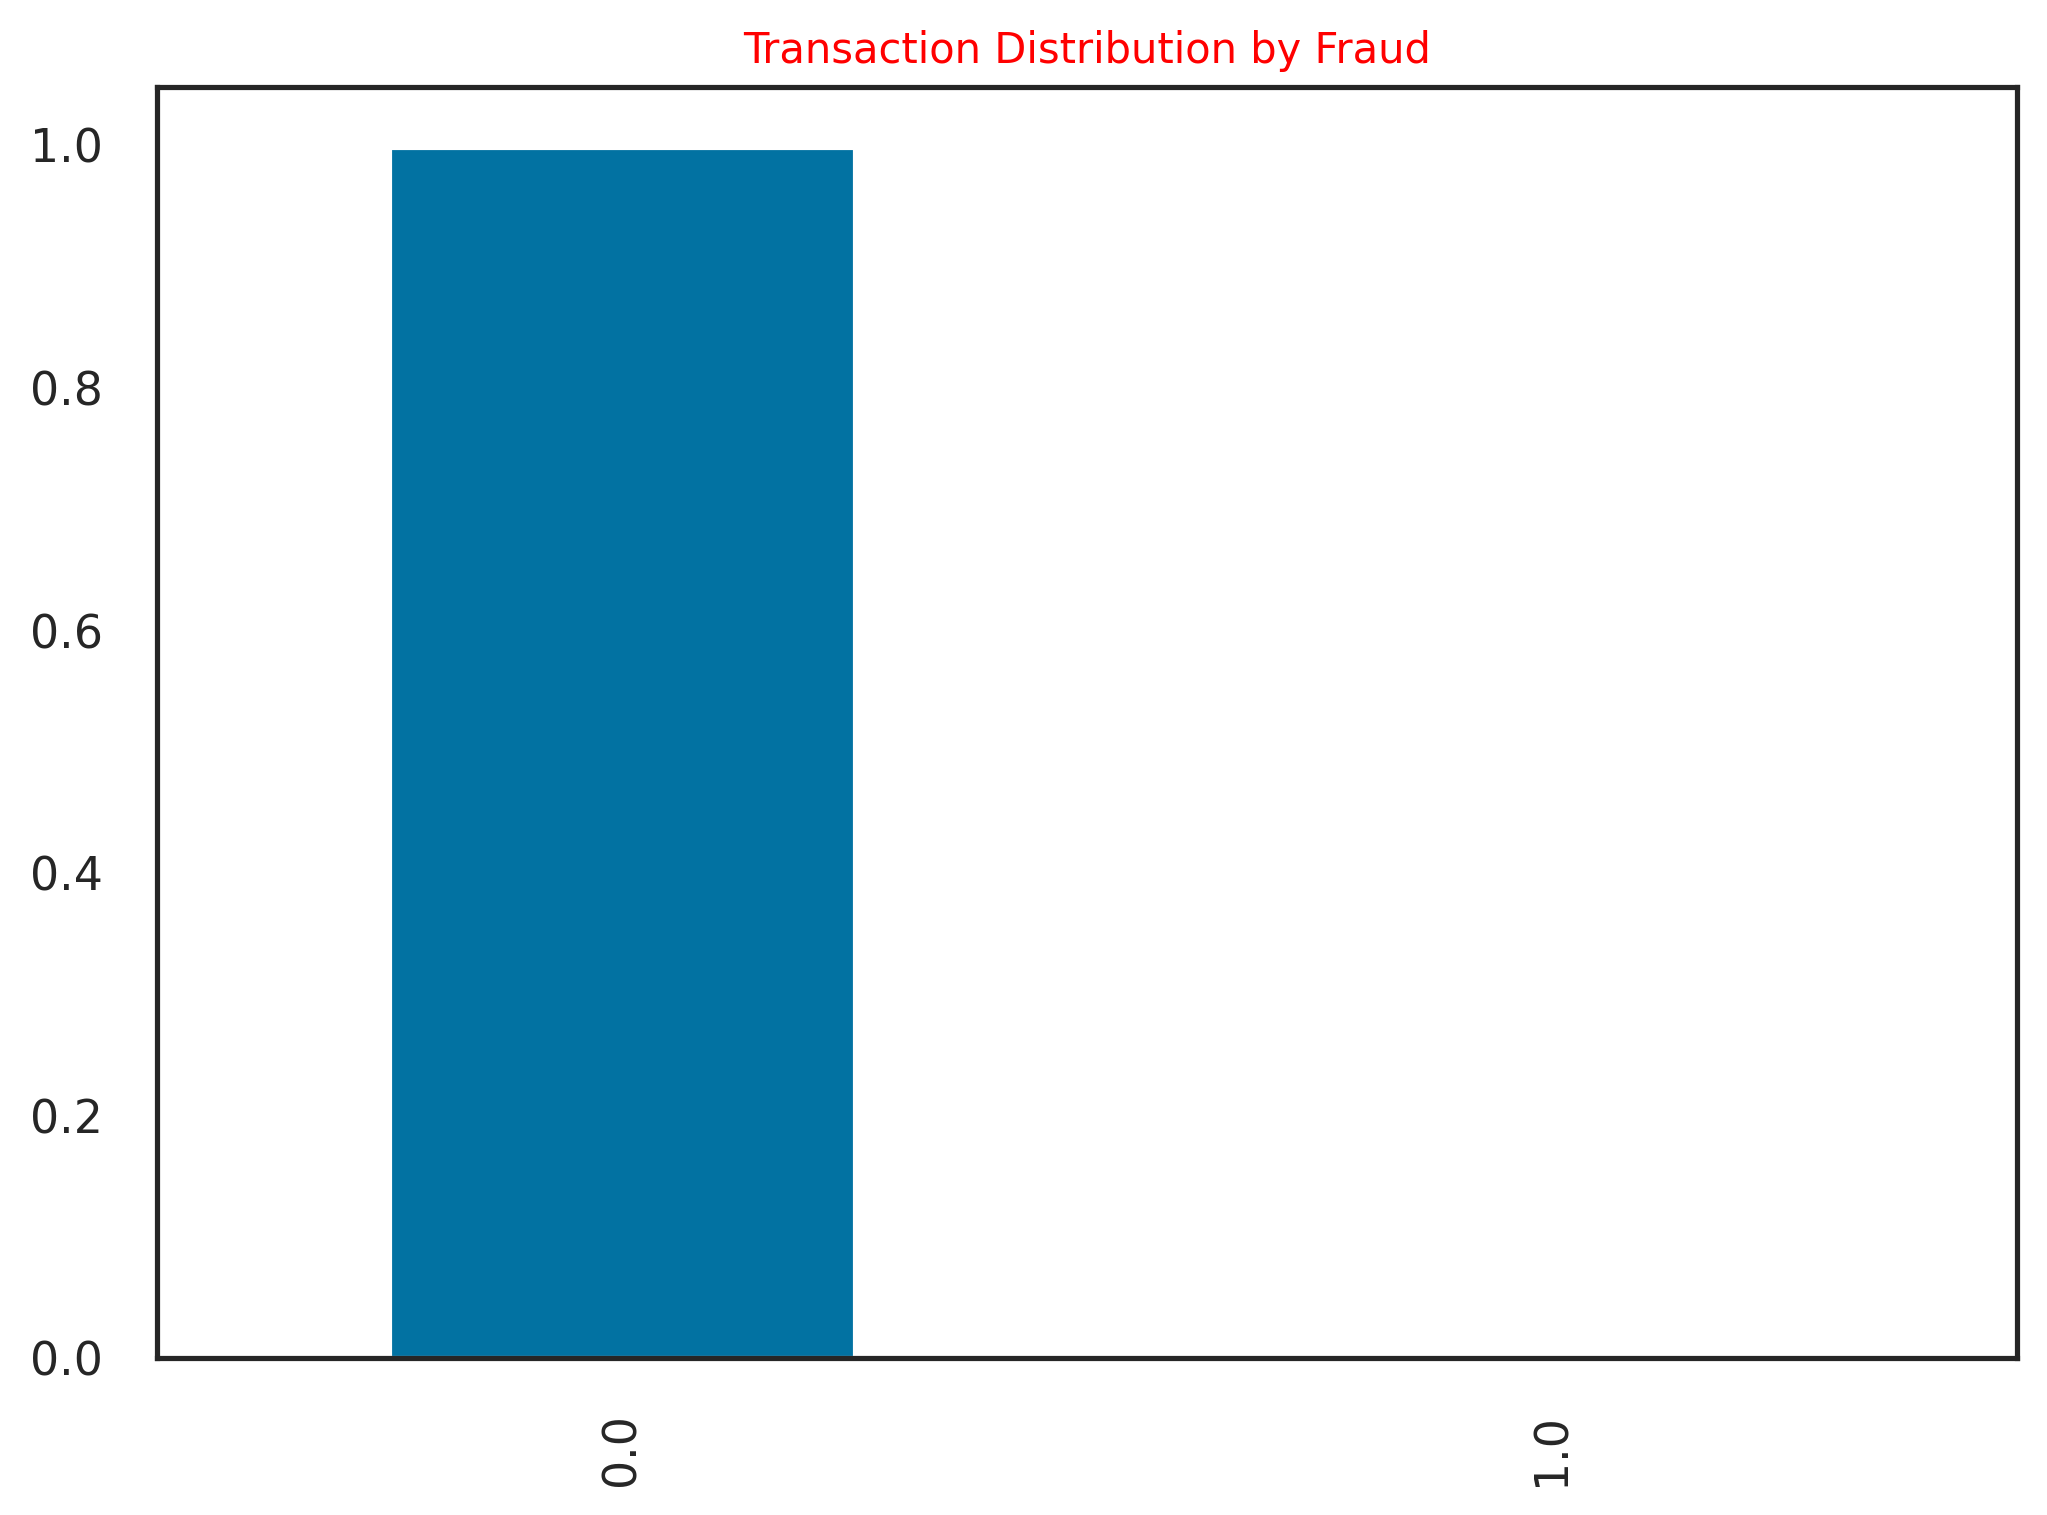

In [14]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [16]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

0.0    0.995899
1.0    0.004101
Name: is_fraud, dtype: float64

Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

## Univariate Analysis
The following columns seems of very less/ no significance in determining a fraud case. Primary reason being no model can be created based on person's name or his PII or some unique ID/ S.no. assigned. Hence, dropping them:-

1. cc_num
2. first
3. last
4. street
5. trans_num

In [17]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [18]:
# Inspecting the fraud dataset
fraud.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob     unix_time  merch_lat  merch_long  \
0     Mechanical engineer  1968-03-19  1.371817e+09  33.986391  -81.200714   
1  Sales professional, IT  1990-01-17  1.371817e+09  39.450498 -109.960431   
2       Librarian, public  1970-10-21  1.371817e+09  40.495810  -74.196111   
3            Set designer  1987-07-25  1.371817e+09  28.812398  -80.883061   
4      Furniture designer  1955-07-06  1.371817e+09  44.959148  -85.884734   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [19]:
# Inspecting the fraud test dataset
fraud_test.head()

trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job         dob     unix_time  merch_lat  \
0          Psychologist, counselling  1988-03-09  1.325376e+09  36.011293   
1  Special educational needs teacher  1978-06-21  1.325376e+09  49.159047   
2        Nature conservation officer  1962-01-19  1.325376e+09  43.150704   
3                    Patent attorney  1967-01-12  1.325376e+09  47.034331   
4     Dance movement psychotherapist  1986-03-28  1.325376e+09  38.674999   

   merch_long  is_fraud  
0  -82.048315       0.0  
1 -118.186462       0.0  
2 -112.154481       0.0  
3 -112.561071       0.0  
4  -78.632459       0.0

In [56]:
# Converting dob to age
from datetime import date
fraud['dob'] = pd.to_datetime(fraud['dob'])
fraud['age'] = (pd.to_datetime('now') - fraud['dob'])/ np.timedelta64(1, 'Y')
fraud['age'] = fraud['age'].astype(int)
fraud.drop(['dob'], axis=1, inplace=True)
fraud.head()

<ipython-input-56-91d80dd0ebc4>:4: FutureWarning:

The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()



merchant  category    amt  gender  city  state    zip      lat      long  \
0       319        10   2.86       1   157     39  29209  33.9659  -80.9355   
1       591        10  29.84       0    16     43  84002  40.3207 -110.4360   
2       611         5  41.28       0    61     33  11710  40.6729  -73.5365   
3       222         9  60.05       1   751      8  32780  28.5697  -80.8191   
4       292        13   3.19       1   246     21  49632  44.2529  -85.0170   

   city_pop  job     unix_time  merch_lat  merch_long  is_fraud  trans_date  \
0    333497  274  1.371817e+09  33.986391  -81.200714       0.0  2020-06-21   
1       302  390  1.371817e+09  39.450498 -109.960431       0.0  2020-06-21   
2     34496  258  1.371817e+09  40.495810  -74.196111       0.0  2020-06-21   
3     54767  405  1.371817e+09  28.812398  -80.883061       0.0  2020-06-21   
4      1126  195  1.371817e+09  44.959148  -85.884734       0.0  2020-06-21   

  trans_time  age  
0   12:14:25   55  
1   12:14:33   33  
2   12:14:53   52  
3   12:15:15   35  
4   12:15:17   67

In [22]:
import pandas as pd
import numpy as np

# Verify 'dob' column data type (optional)
if not pd.api.types.is_datetime64_any_dtype(fraud_test['dob']):
    fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])

# Handle missing or invalid values (optional)
fraud_test['dob'] = fraud_test['dob'].fillna(pd.to_datetime('1900-01-01'))

# Calculate age
fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob']) / np.timedelta64(1, 'Y')
fraud_test['age'] = fraud_test['age'].astype(int)

# Drop 'dob' column
fraud_test.drop(['dob'], axis=1, inplace=True)

# Display the updated DataFrame
fraud_test.head()


<ipython-input-22-1352b6d9c033>:12: FutureWarning:

The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()



trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job     unix_time  merch_lat  merch_long  \
0          Psychologist, counselling  1.325376e+09  36.011293  -82.048315   
1  Special educational needs teacher  1.325376e+09  49.159047 -118.186462   
2        Nature conservation officer  1.325376e+09  43.150704 -112.154481   
3                    Patent attorney  1.325376e+09  47.034331 -112.561071   
4     Dance movement psychotherapist  1.325376e+09  38.674999  -78.632459   

   is_fraud  age  
0       0.0   35  
1       0.0   45  
2       0.0   61  
3       0.0   56  
4       0.0   37

In [23]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

         city state    zip      lat      long  city_pop  \
0    Columbia    SC  29209  33.9659  -80.9355    333497   
1     Altonah    UT  84002  40.3207 -110.4360       302   
2    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  Titusville    FL  32780  28.5697  -80.8191     54767   
4    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob     unix_time  merch_lat  merch_long  \
0     Mechanical engineer  1968-03-19  1.371817e+09  33.986391  -81.200714   
1  Sales professional, IT  1990-01-17  1.371817e+09  39.450498 -109.960431   
2       Librarian, public  1970-10-21  1.371817e+09  40.495810  -74.196111   
3            Set designer  1987-07-25  1.371817e+09  28.812398  -80.883061   
4      Furniture designer  1955-07-06  1.371817e+09  44.959148  -85.884734   

   is_fraud  trans_date trans_time  
0       0.0  2020-06-21   12:14:25  
1       0.0  2020-06-21   12:14:33  
2       0.0  2020-06-21   12:14:53  
3       0.0  2020-06-21   12:15:15  
4       0.0  2020-06-21   12:15:17

In [24]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

merchant       category     amt gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   
2      Malad City    ID  83252  42.1808 -112.2620      4154   
3         Boulder    MT  59632  46.2306 -112.1138      1939   
4        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job     unix_time  merch_lat  merch_long  \
0          Psychologist, counselling  1.325376e+09  36.011293  -82.048315   
1  Special educational needs teacher  1.325376e+09  49.159047 -118.186462   
2        Nature conservation officer  1.325376e+09  43.150704 -112.154481   
3                    Patent attorney  1.325376e+09  47.034331 -112.561071   
4     Dance movement psychotherapist  1.325376e+09  38.674999  -78.632459   

   is_fraud  age  trans_date trans_time  
0       0.0   35  2019-01-01   00:00:18  
1       0.0   45  2019-01-01   00:00:44  
2       0.0   61  2019-01-01   00:00:51  
3       0.0   56  2019-01-01   00:01:16  
4       0.0   37  2019-01-01   00:03:06

In [25]:
# Check on numeric columns for outliers
fraud.describe()

amt           zip           lat          long      city_pop  \
count  11697.000000  11697.000000  11697.000000  11697.000000  1.169700e+04   
mean      66.241288  48583.520988     38.491370    -90.029371  9.471794e+04   
std      124.015784  26706.800199      5.112304     13.575833  3.222010e+05   
min        1.000000   1257.000000     20.027100   -165.672300  2.300000e+01   
25%        9.200000  26237.000000     34.509100    -96.618400  7.820000e+02   
50%       43.770000  48034.000000     39.342600    -86.965700  2.691000e+03   
75%       79.770000  72011.000000     42.014400    -80.175200  2.163500e+04   
max     3396.840000  99783.000000     65.689900    -67.950300  2.906700e+06   

          unix_time     merch_lat    merch_long      is_fraud  
count  1.169600e+04  11696.000000  11696.000000  11696.000000  
mean   1.371949e+09     38.477973    -90.028840      0.002479  
std    7.917888e+04      5.144570     13.592734      0.049735  
min    1.371817e+09     19.163455   -166.464422      0.000000  
25%    1.371885e+09     34.627043    -96.595760      0.000000  
50%    1.371941e+09     39.332037    -87.238137      0.000000  
75%    1.372010e+09     41.997231    -80.270511      0.000000  
max    1.372113e+09     65.951727    -67.122946      1.000000

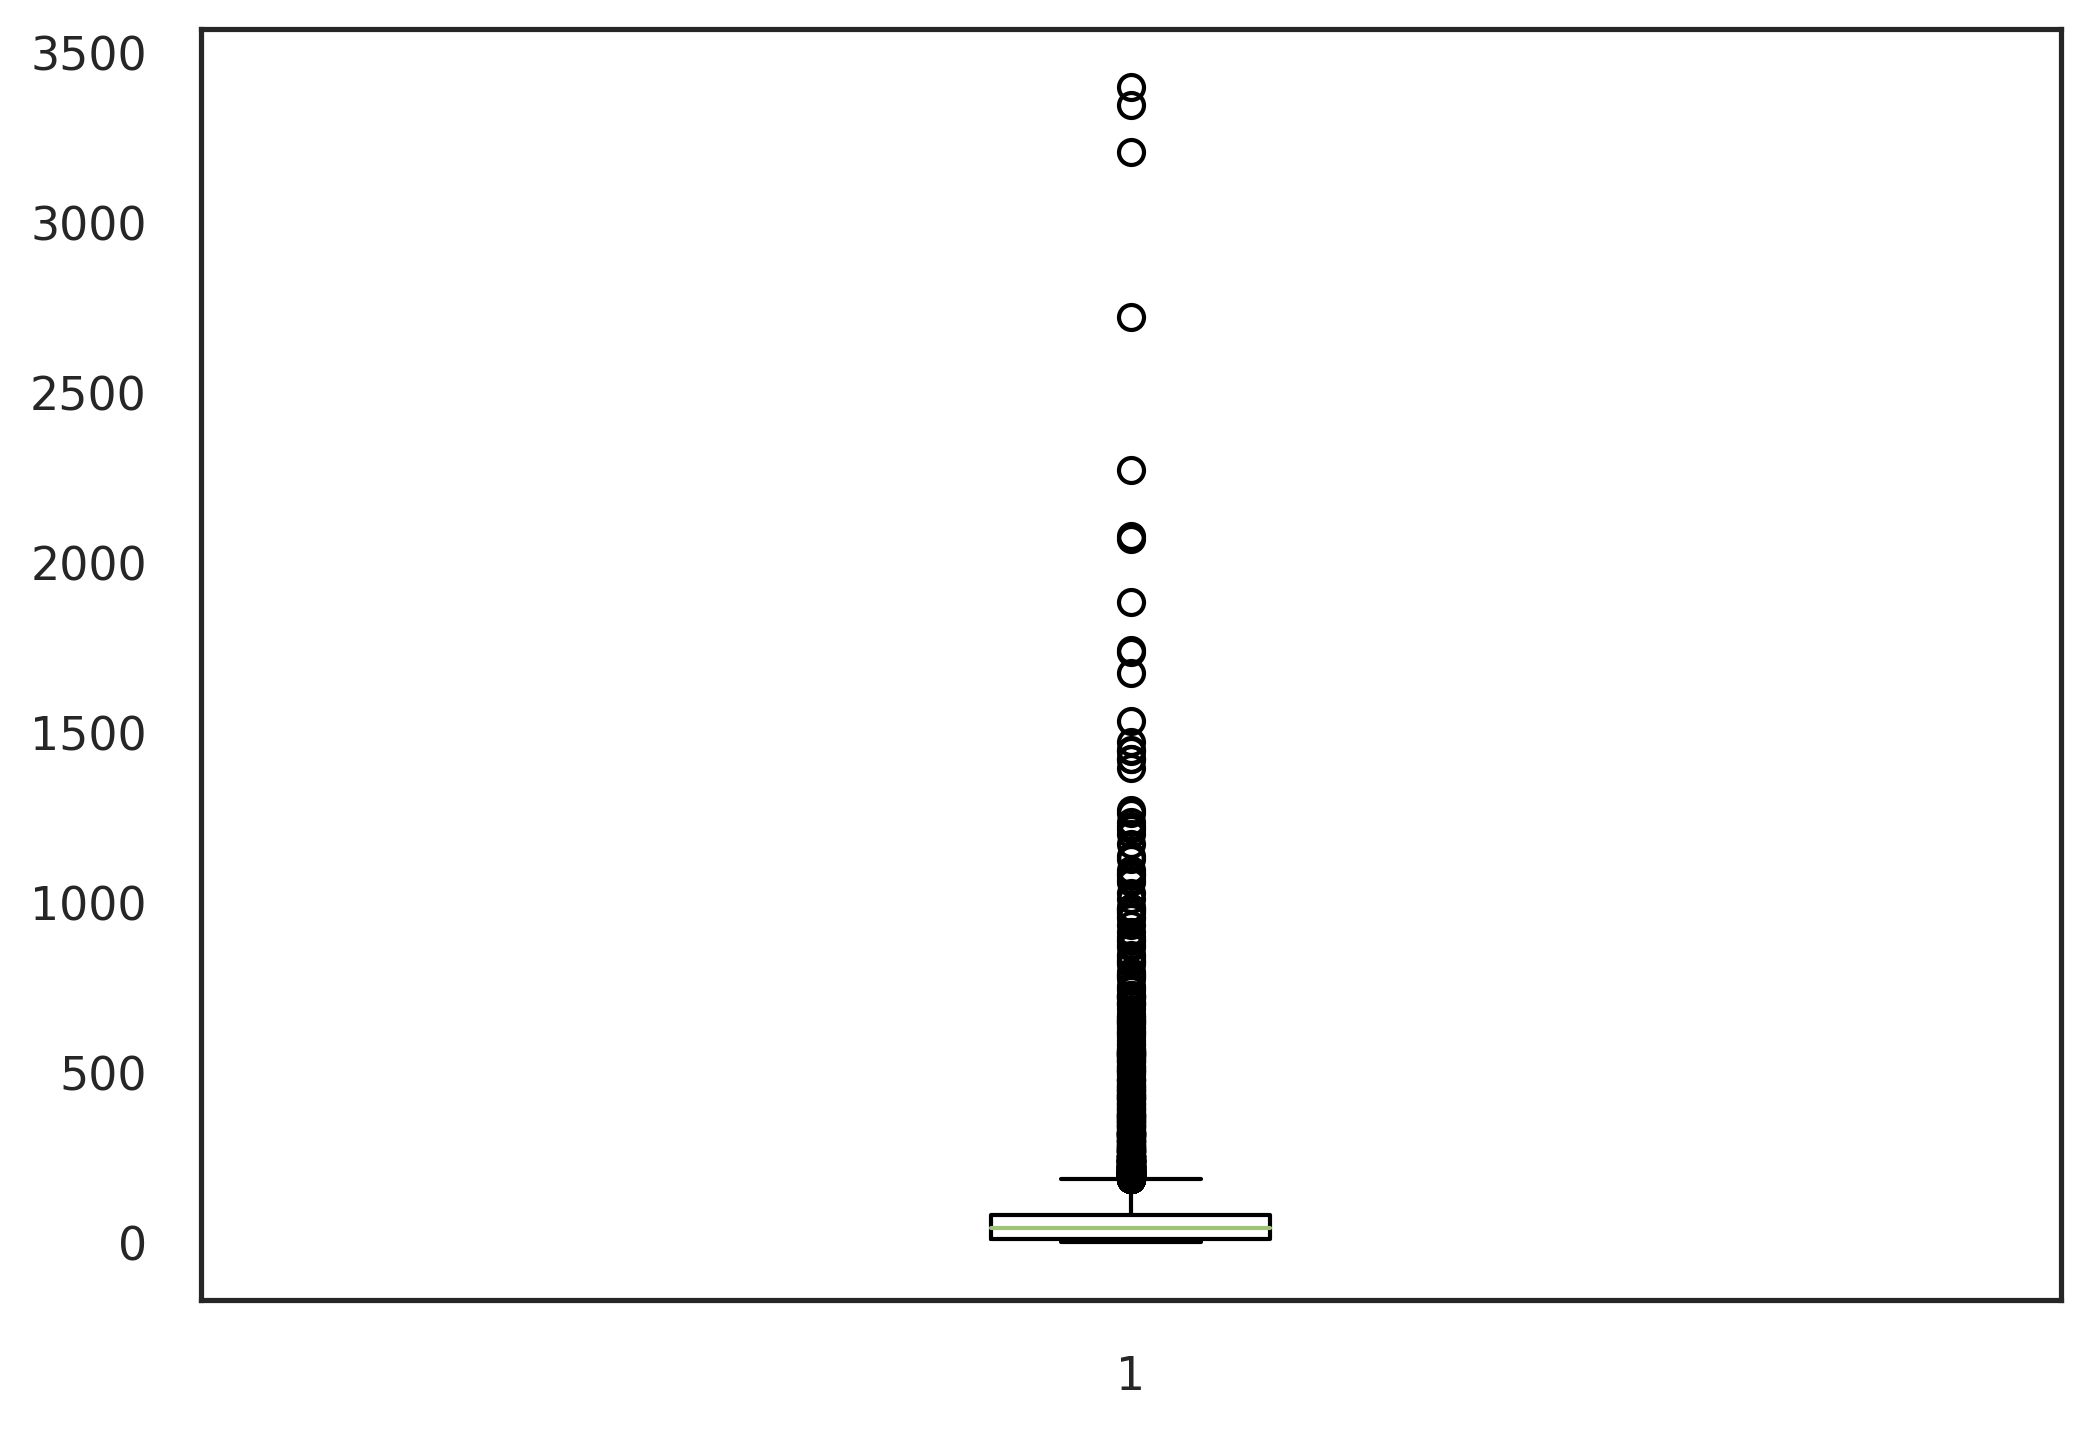

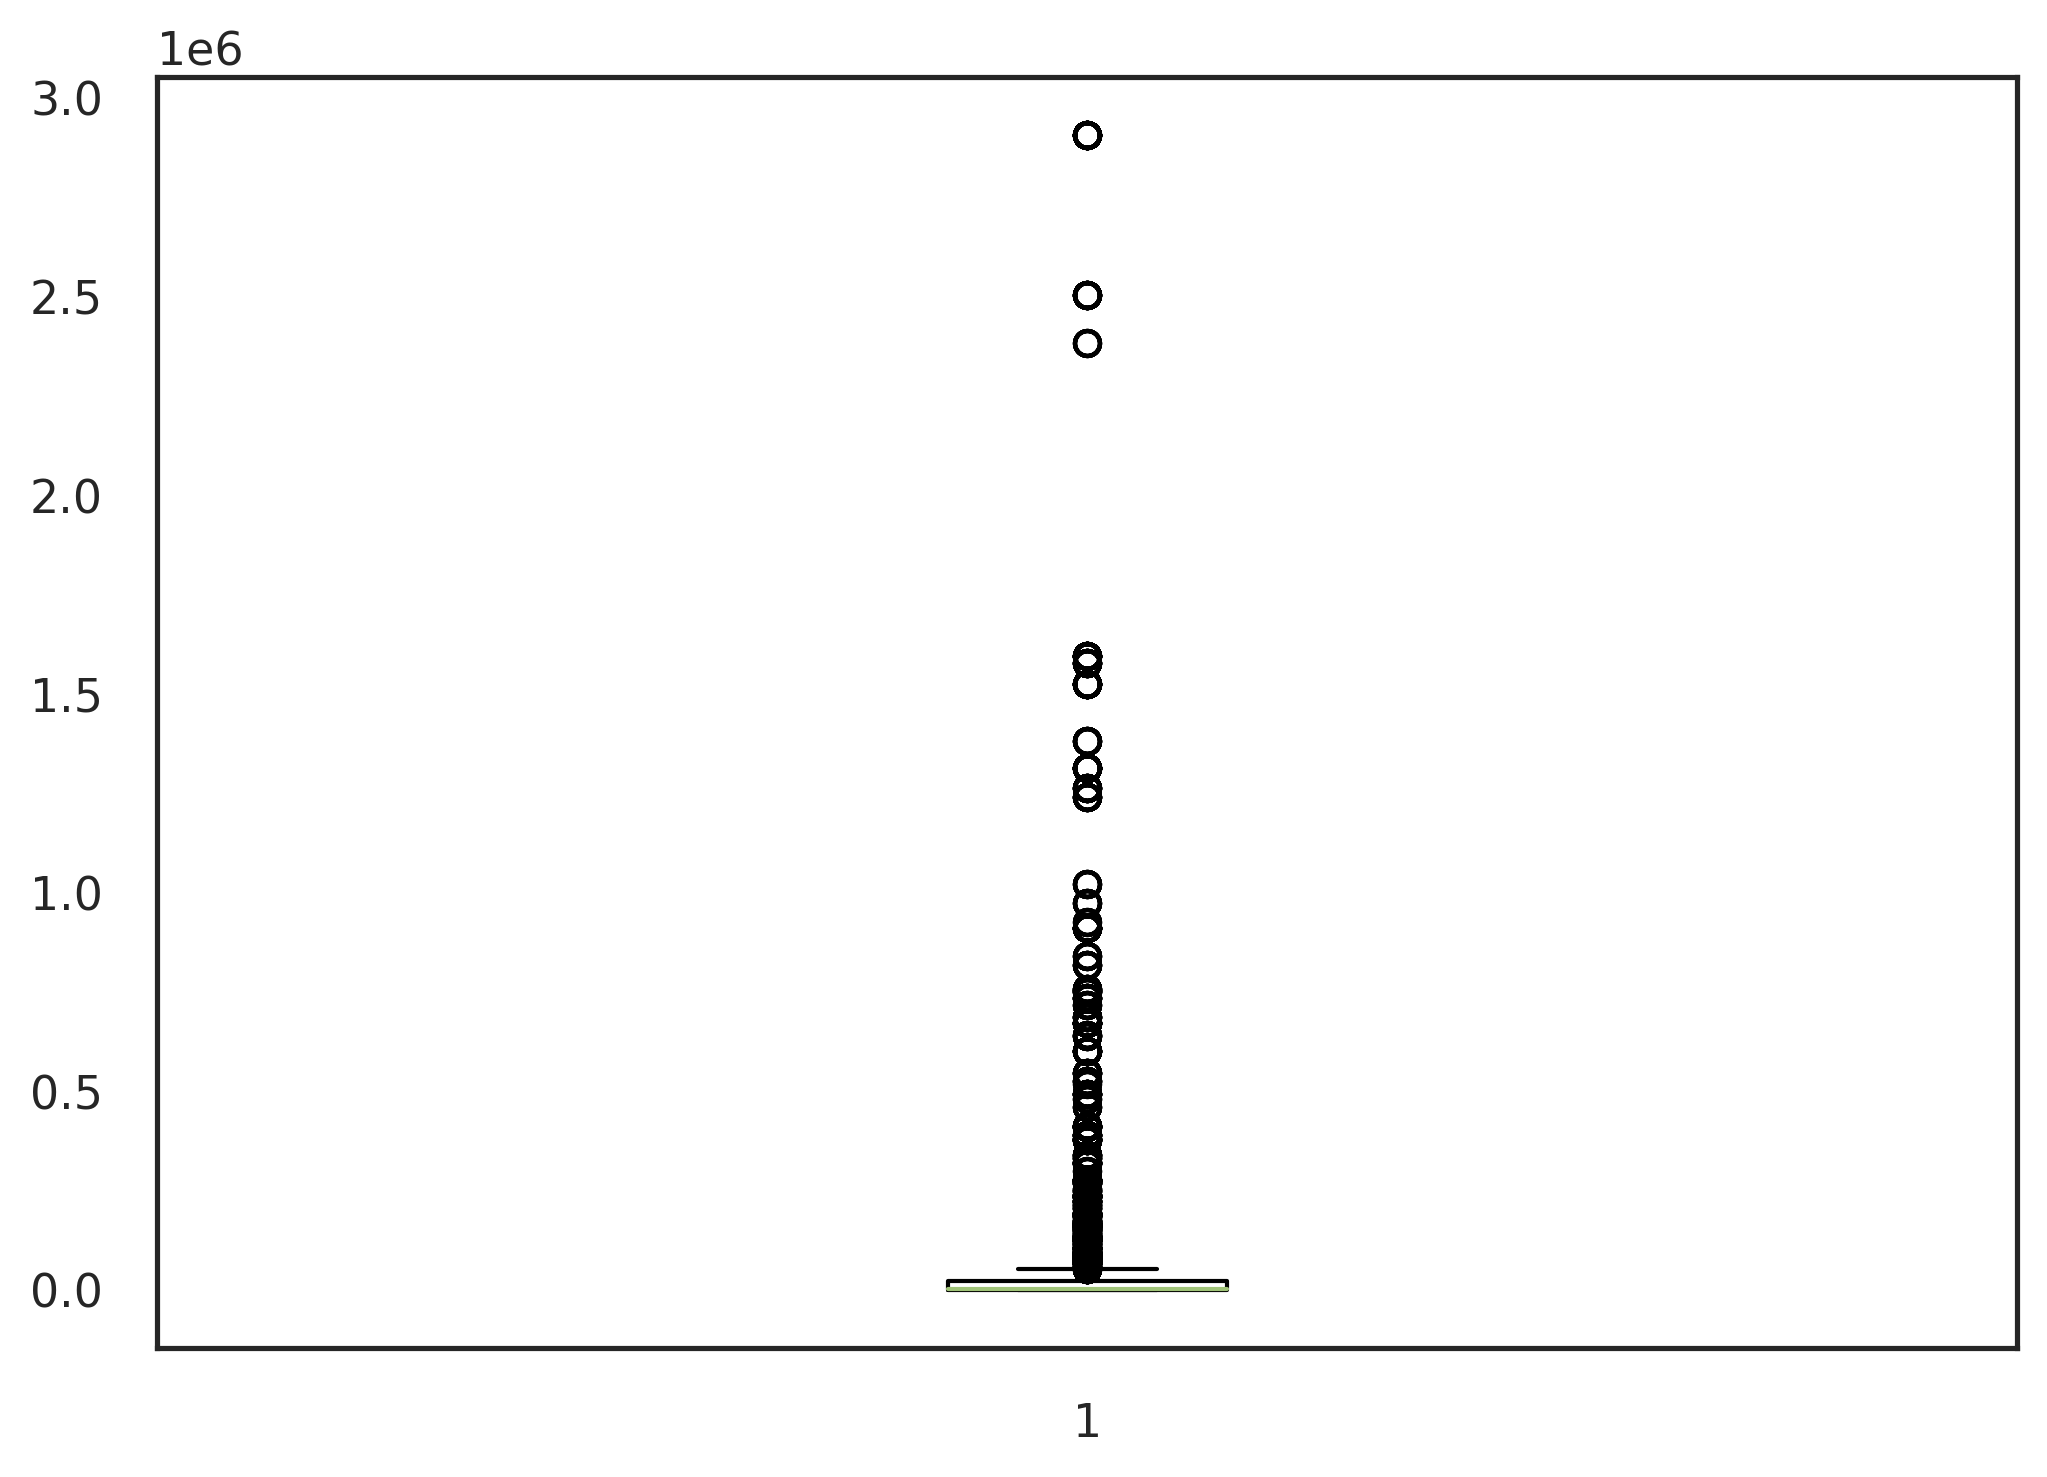

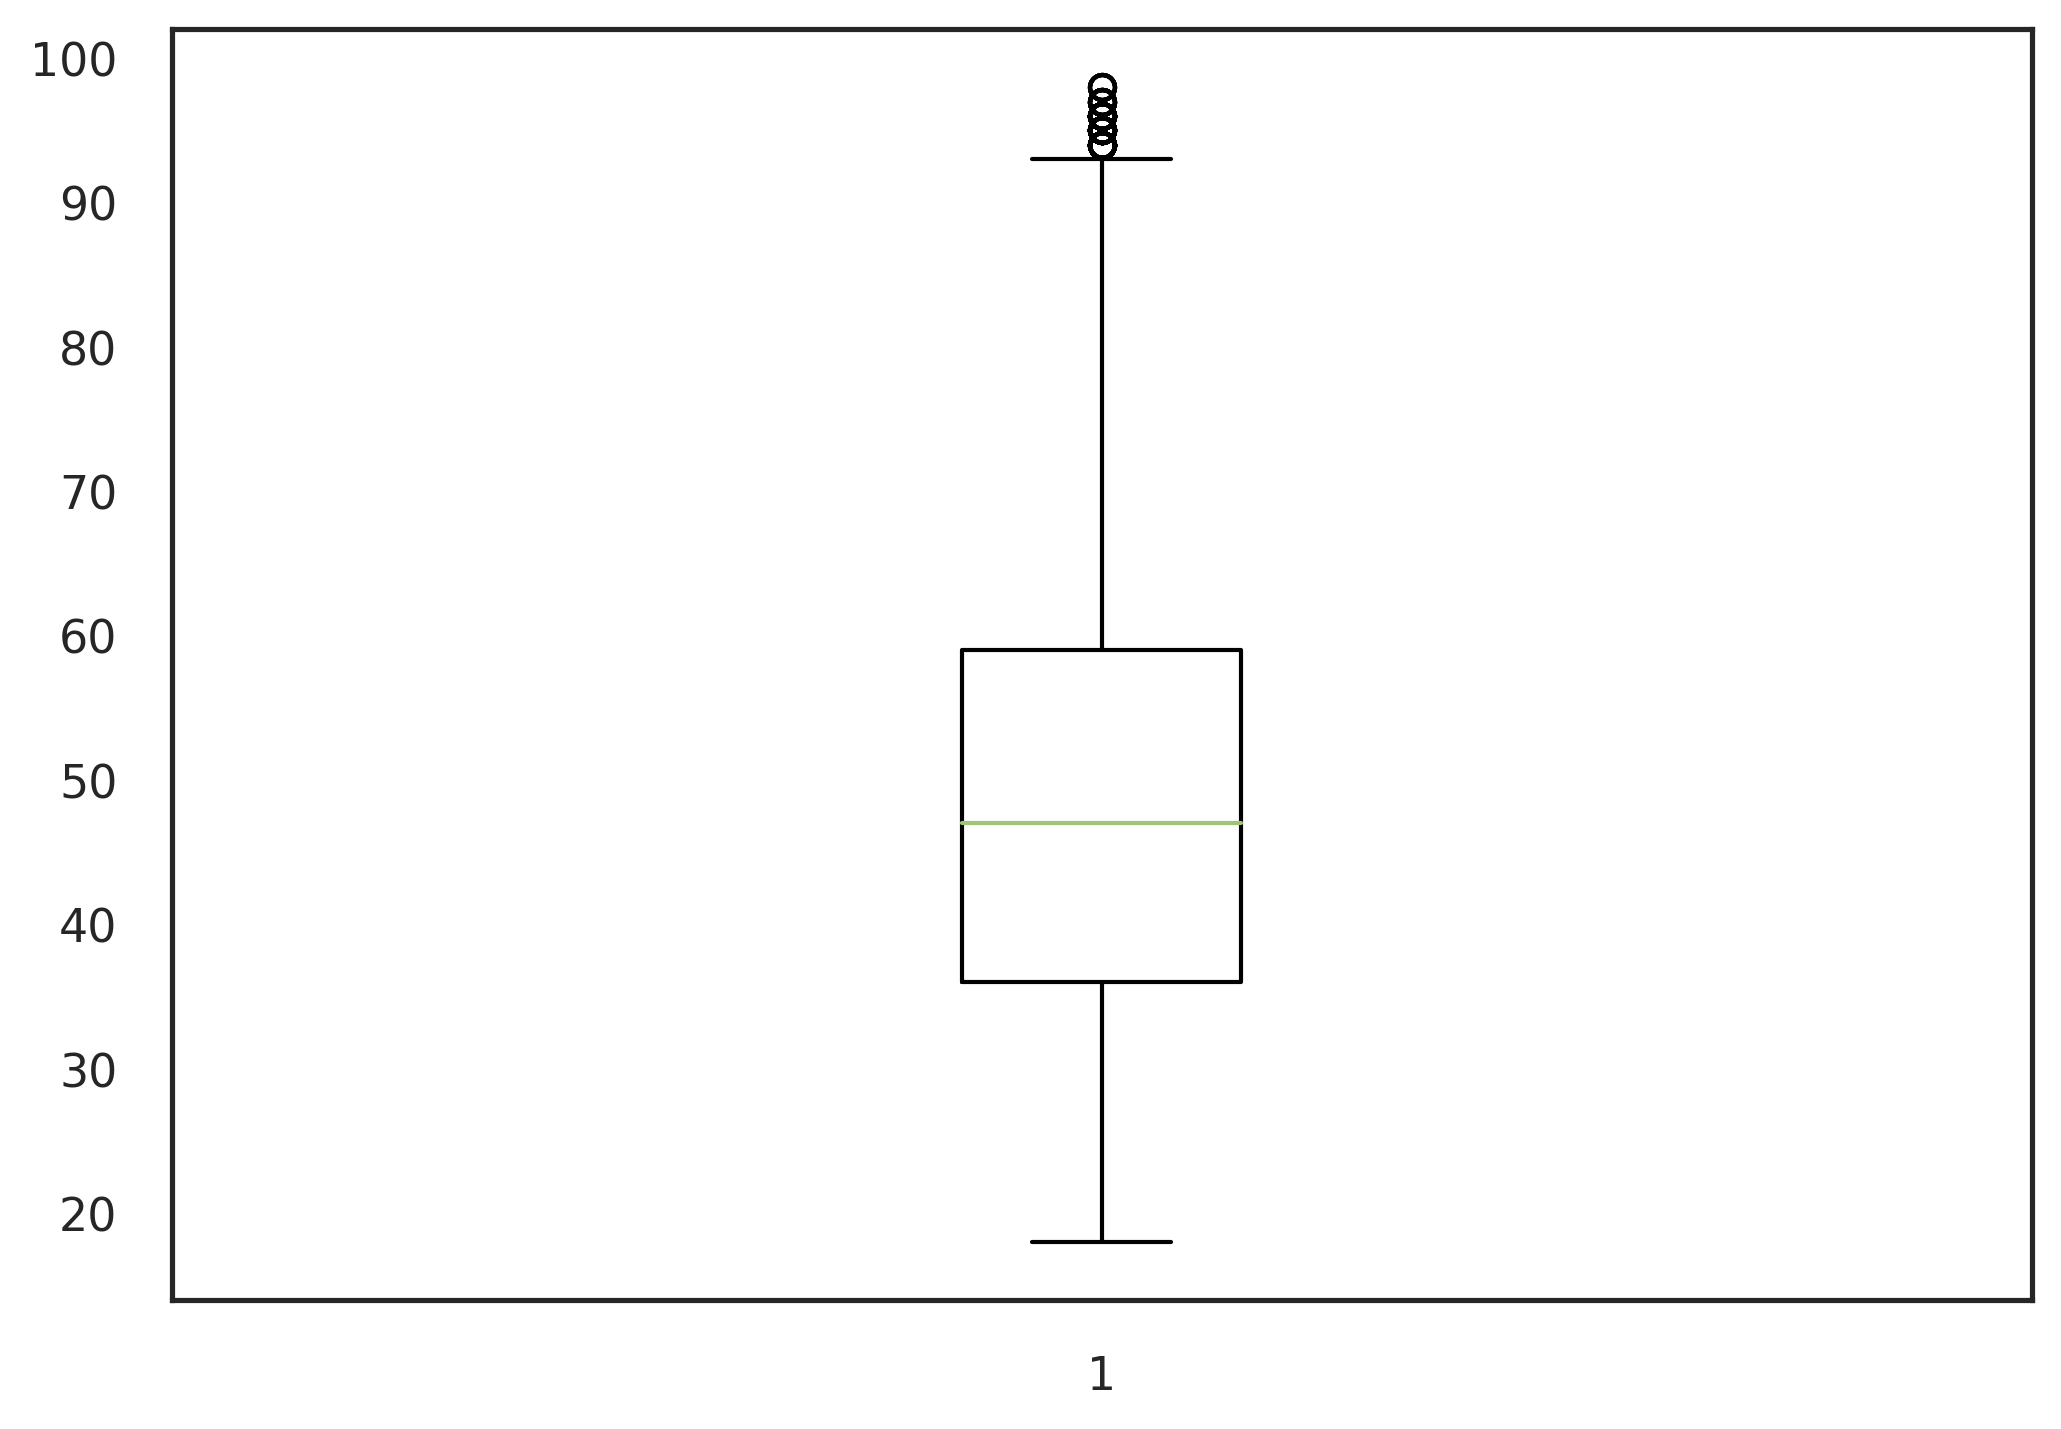

In [57]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.boxplot(fraud.amt)
plt.show()
plt.boxplot(fraud.city_pop)
plt.show()
plt.boxplot(fraud.age)
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [33]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

[2, 6, 7, 8, 9, 12]
[0, 1, 3, 4, 5, 10, 11]
Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'trans_time'],
      dtype='object')


In [34]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

merchant
fraud_Cormier LLC          0.003591
fraud_Botsford and Sons    0.003249
fraud_Dickinson Ltd        0.003249
fraud_Boyer PLC            0.003249
fraud_Schumm PLC           0.003163
                             ...   
fraud_Kutch Group          0.000256
fraud_Cummings Group       0.000256
fraud_Spinka-Welch         0.000171
fraud_Satterfield-Lowe     0.000171
fraud_McCullough Group     0.000085
Name: merchant, Length: 693, dtype: float64
**************************************************
category
home              0.103531
kids_pets         0.096435
shopping_pos      0.091476
gas_transport     0.081388
personal_care     0.078054
food_dining       0.077541
grocery_pos       0.077456
shopping_net      0.075404
health_fitness    0.075318
entertainment     0.071642
misc_pos          0.061469
misc_net          0.045738
travel            0.035394
grocery_net       0.029153
Name: category, dtype: float64
**************************************************
gender
F    0.55433
M    0.4456

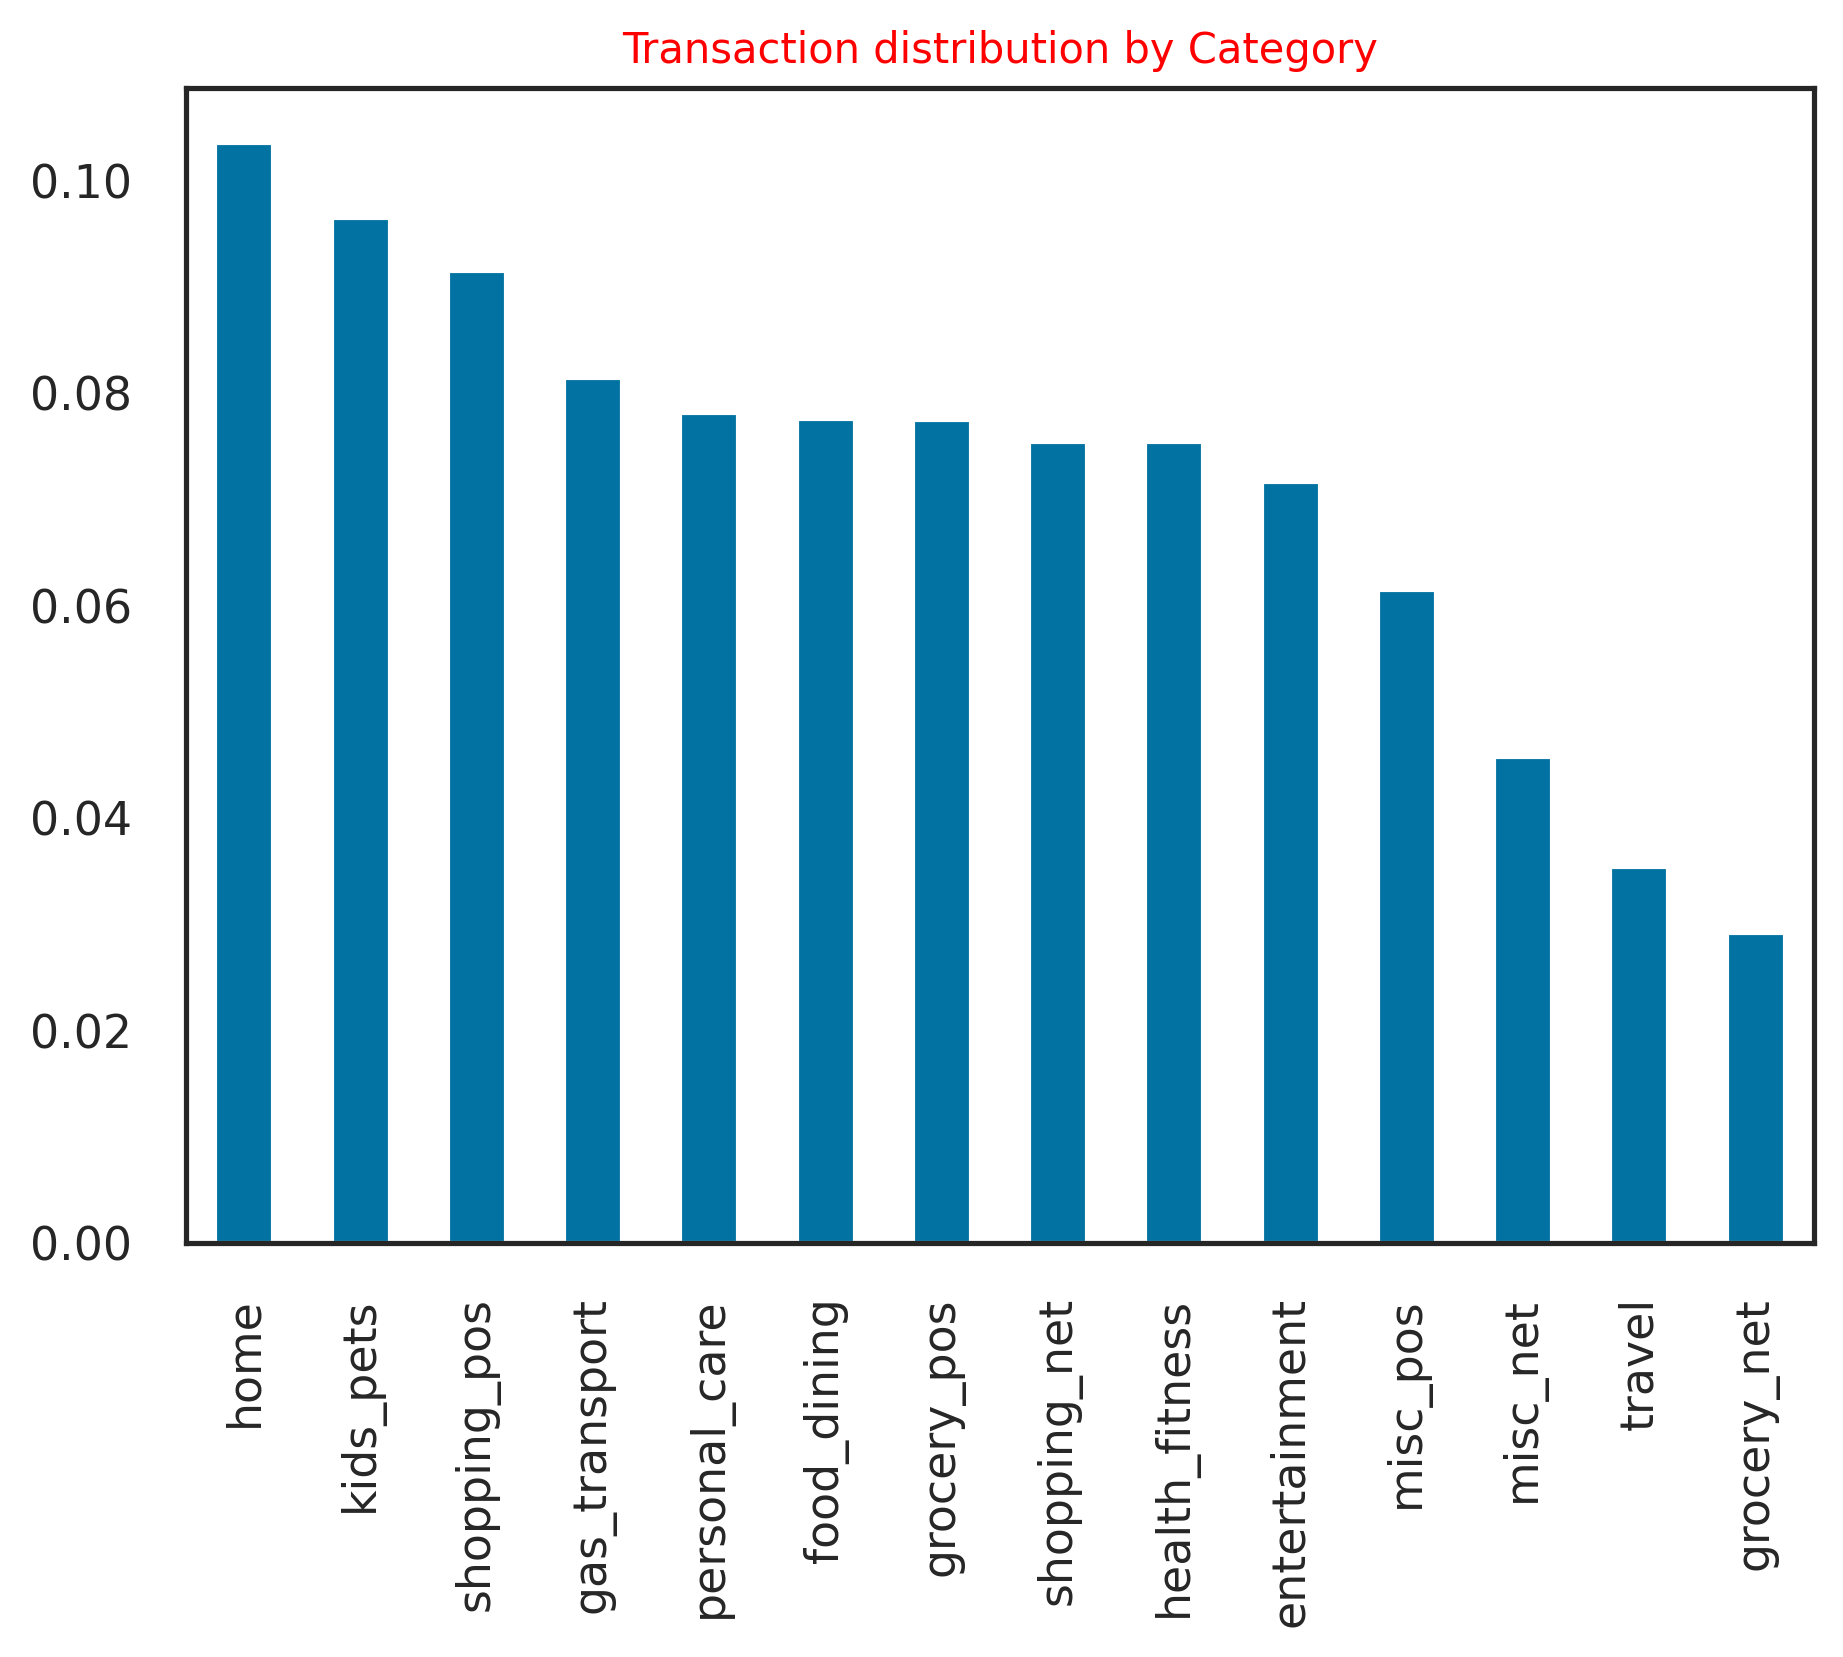

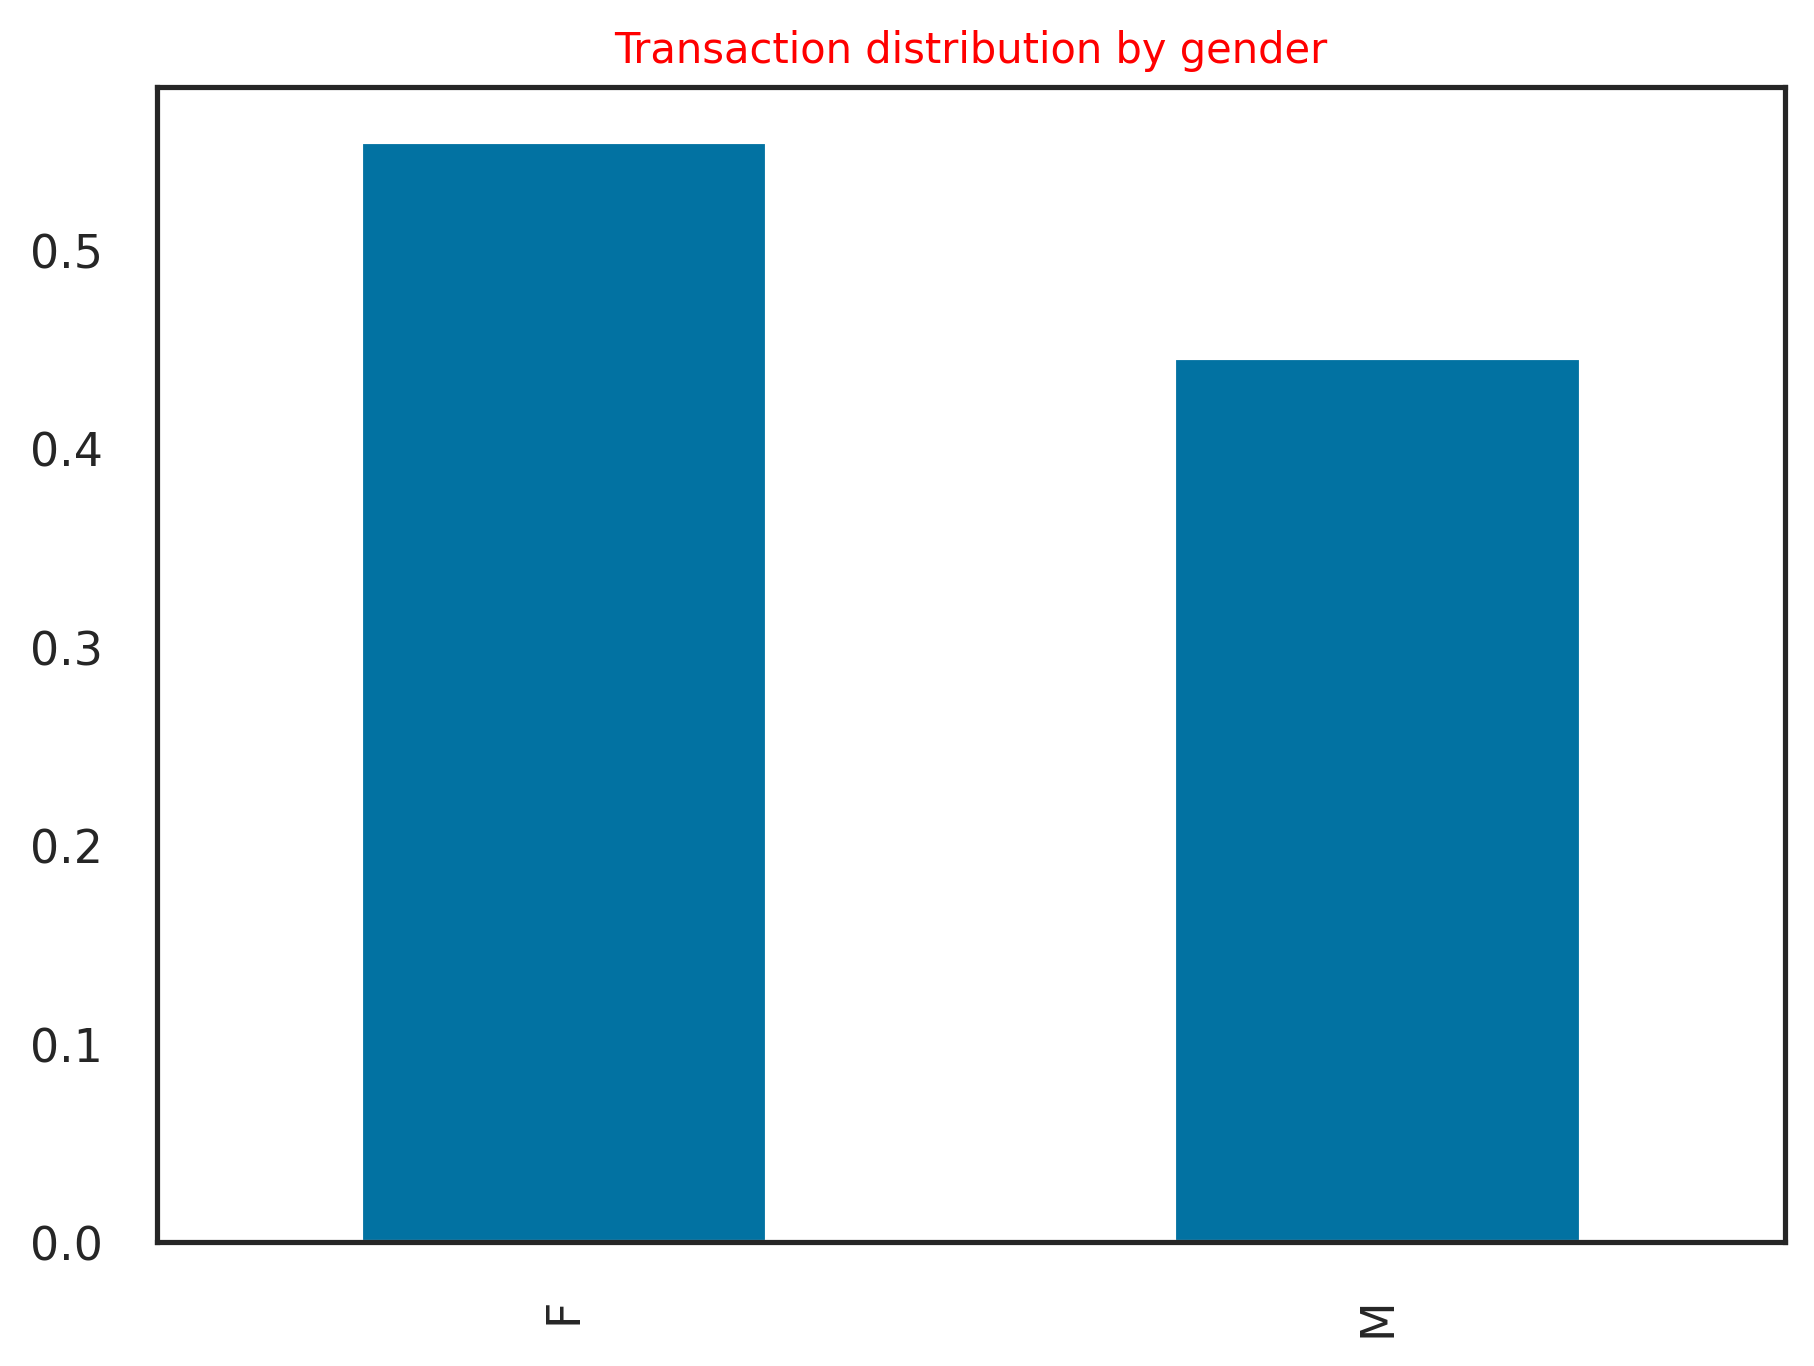

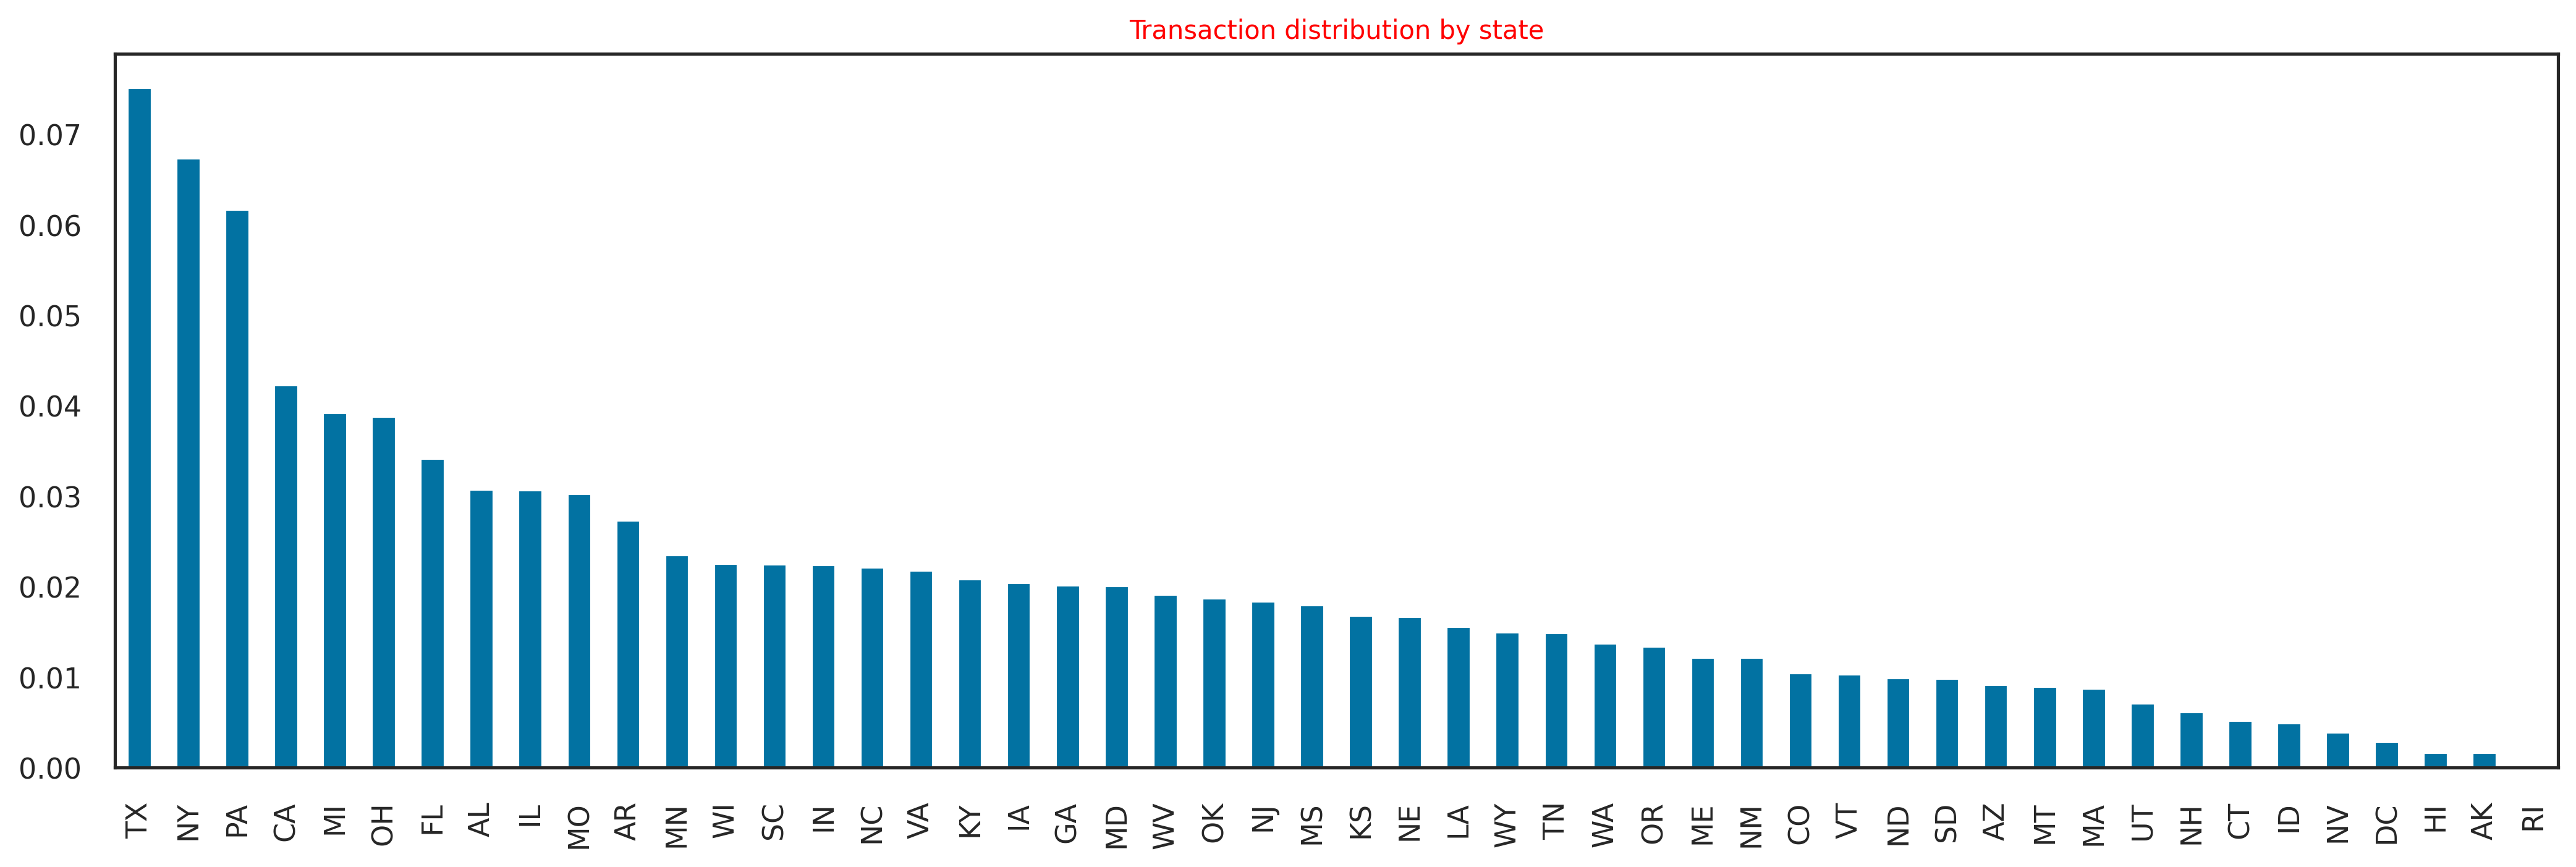

In [35]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
fraud.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
fraud.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
fraud.state.value_counts(normalize=True).plot.bar()
plt.show()

## Bi-Variate Analysis
Check for the behaviour of various columns against the is_fraud column

In [36]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11697 entries, 0 to 11696
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    11697 non-null  object 
 1   category    11697 non-null  object 
 2   amt         11697 non-null  float64
 3   gender      11697 non-null  object 
 4   city        11697 non-null  object 
 5   state       11697 non-null  object 
 6   zip         11697 non-null  int64  
 7   lat         11697 non-null  float64
 8   long        11697 non-null  float64
 9   city_pop    11697 non-null  int64  
 10  job         11697 non-null  object 
 11  dob         11697 non-null  object 
 12  unix_time   11696 non-null  float64
 13  merch_lat   11696 non-null  float64
 14  merch_long  11696 non-null  float64
 15  is_fraud    11696 non-null  float64
 16  trans_date  11697 non-null  object 
 17  trans_time  11697 non-null  object 
dtypes: float64(7), int64(2), object(9)
memory usage: 1.6+ MB


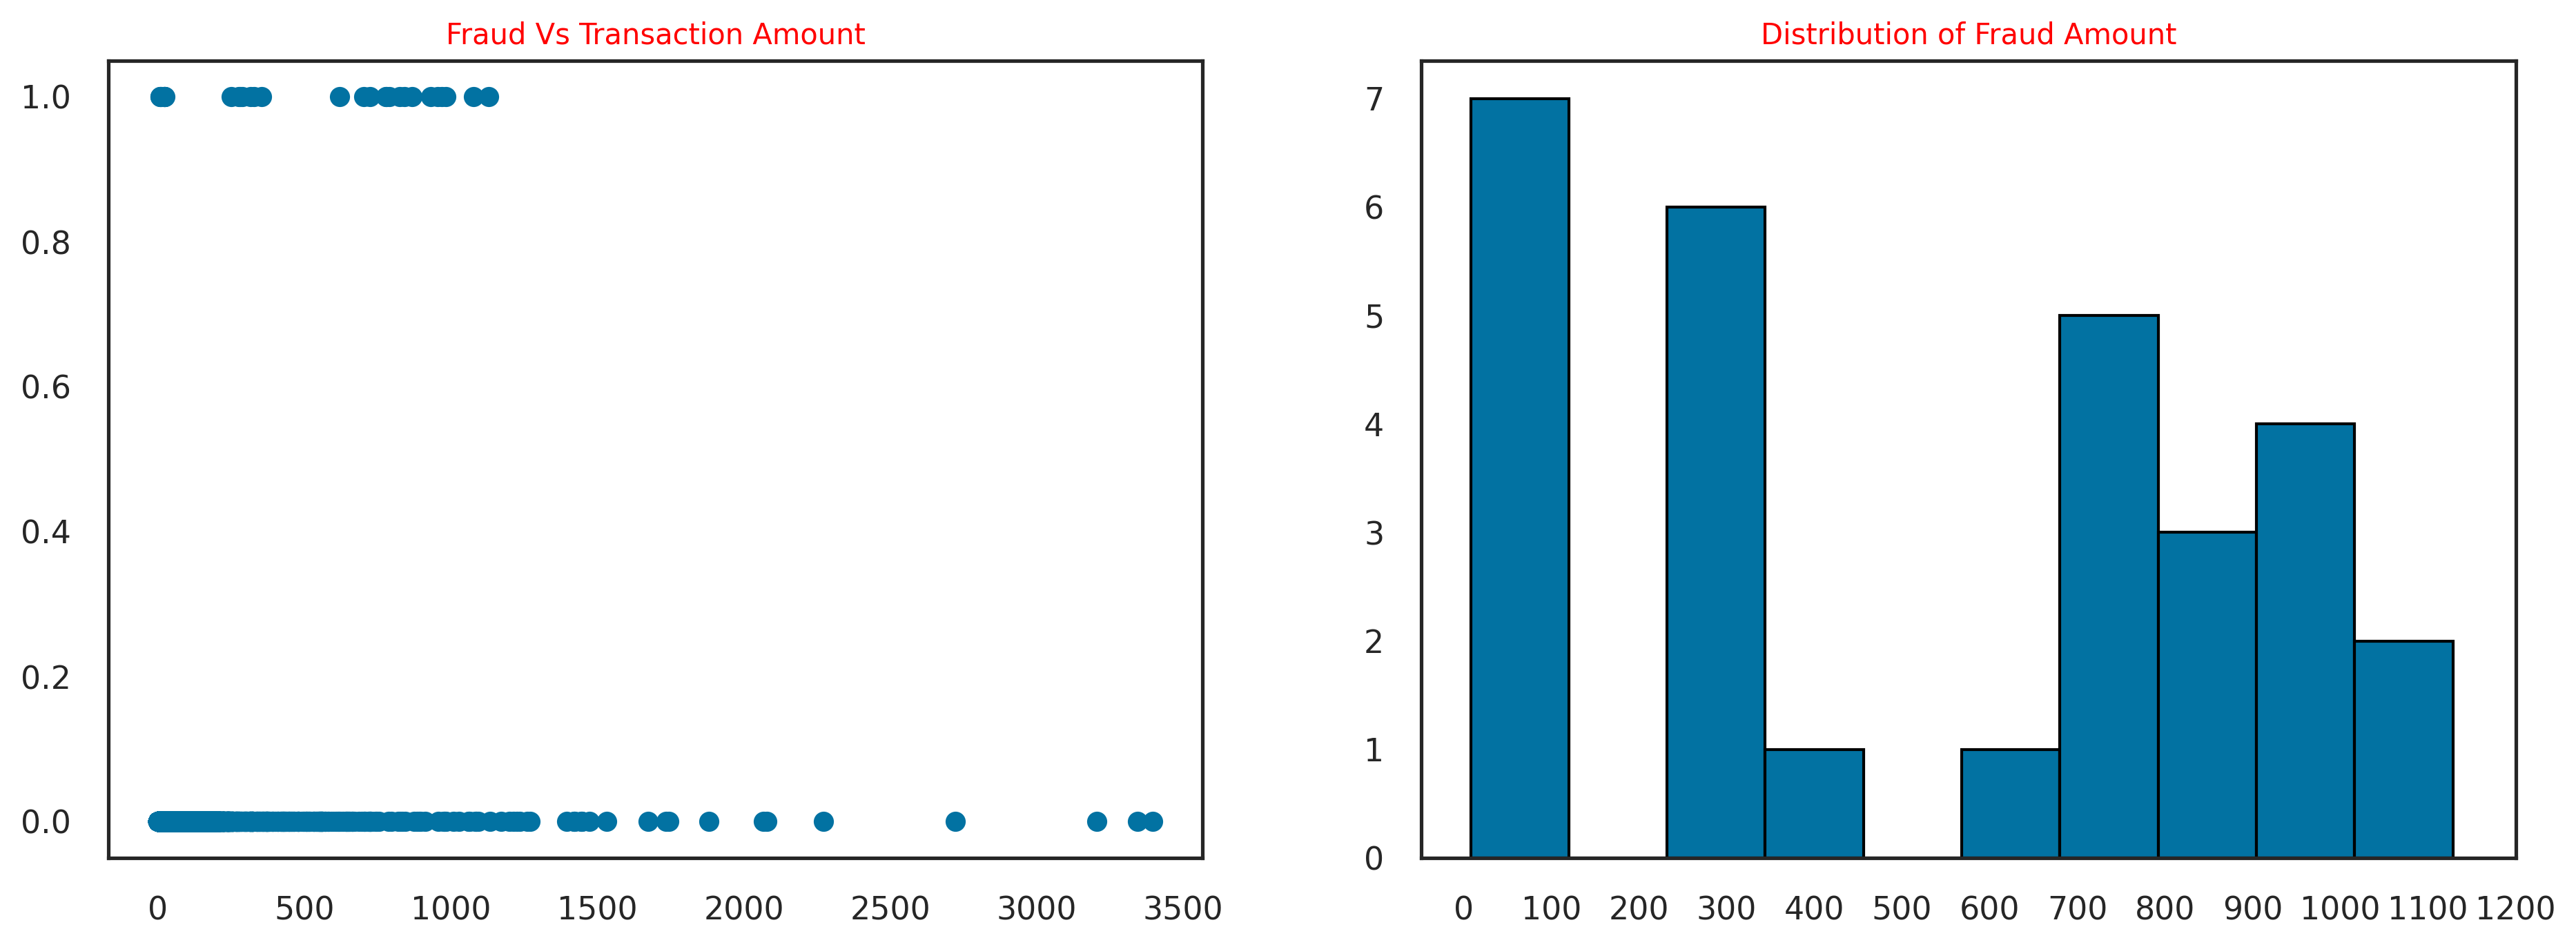

In [37]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

In [38]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 11
fraud_Abbott-Steuber                23
fraud_Abernathy and Sons            13
fraud_Abshire PLC                   24
fraud_Adams, Kovacek and Kuhlman     9
Name: is_fraud, dtype: int64

In [39]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

fraud_Rodriguez, Yost and Jenkins    2
fraud_Hamill-D'Amore                 1
fraud_Durgan-Auer                    1
fraud_Huels-Hahn                     1
fraud_Heidenreich PLC                1
Name: merchant, dtype: int64

In [40]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

fraud_Rodriguez, Yost and Jenkins          10.526316
fraud_Reichert, Rowe and Mraz               9.090909
fraud_Skiles-Ankunding                      7.692308
fraud_Kerluke, Considine and Macejkovic     7.142857
fraud_Durgan-Auer                           7.142857
                                             ...    
fraud_Zemlak Group                               NaN
fraud_Zemlak, Tillman and Cremin                 NaN
fraud_Ziemann-Waters                             NaN
fraud_Zieme, Bode and Dooley                     NaN
fraud_Zulauf LLC                                 NaN
Length: 693, dtype: float64

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.

In [41]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

In [42]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total = fraud.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = fraud[fraud.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

Springville       100.000000
Benton             75.000000
Vero Beach         64.285714
Denham Springs     40.000000
Notrees            12.500000
dtype: float64

As can be seen, few cities have all transactions as fraud. All these cities have low transaction rate. There are 58 such cities.

In [43]:
# Transforming alphabetic city data into numeric to be processed by the model
fraud.city = label_encoder.fit_transform(fraud.city)
fraud_test.city = label_encoder.fit_transform(fraud_test.city)

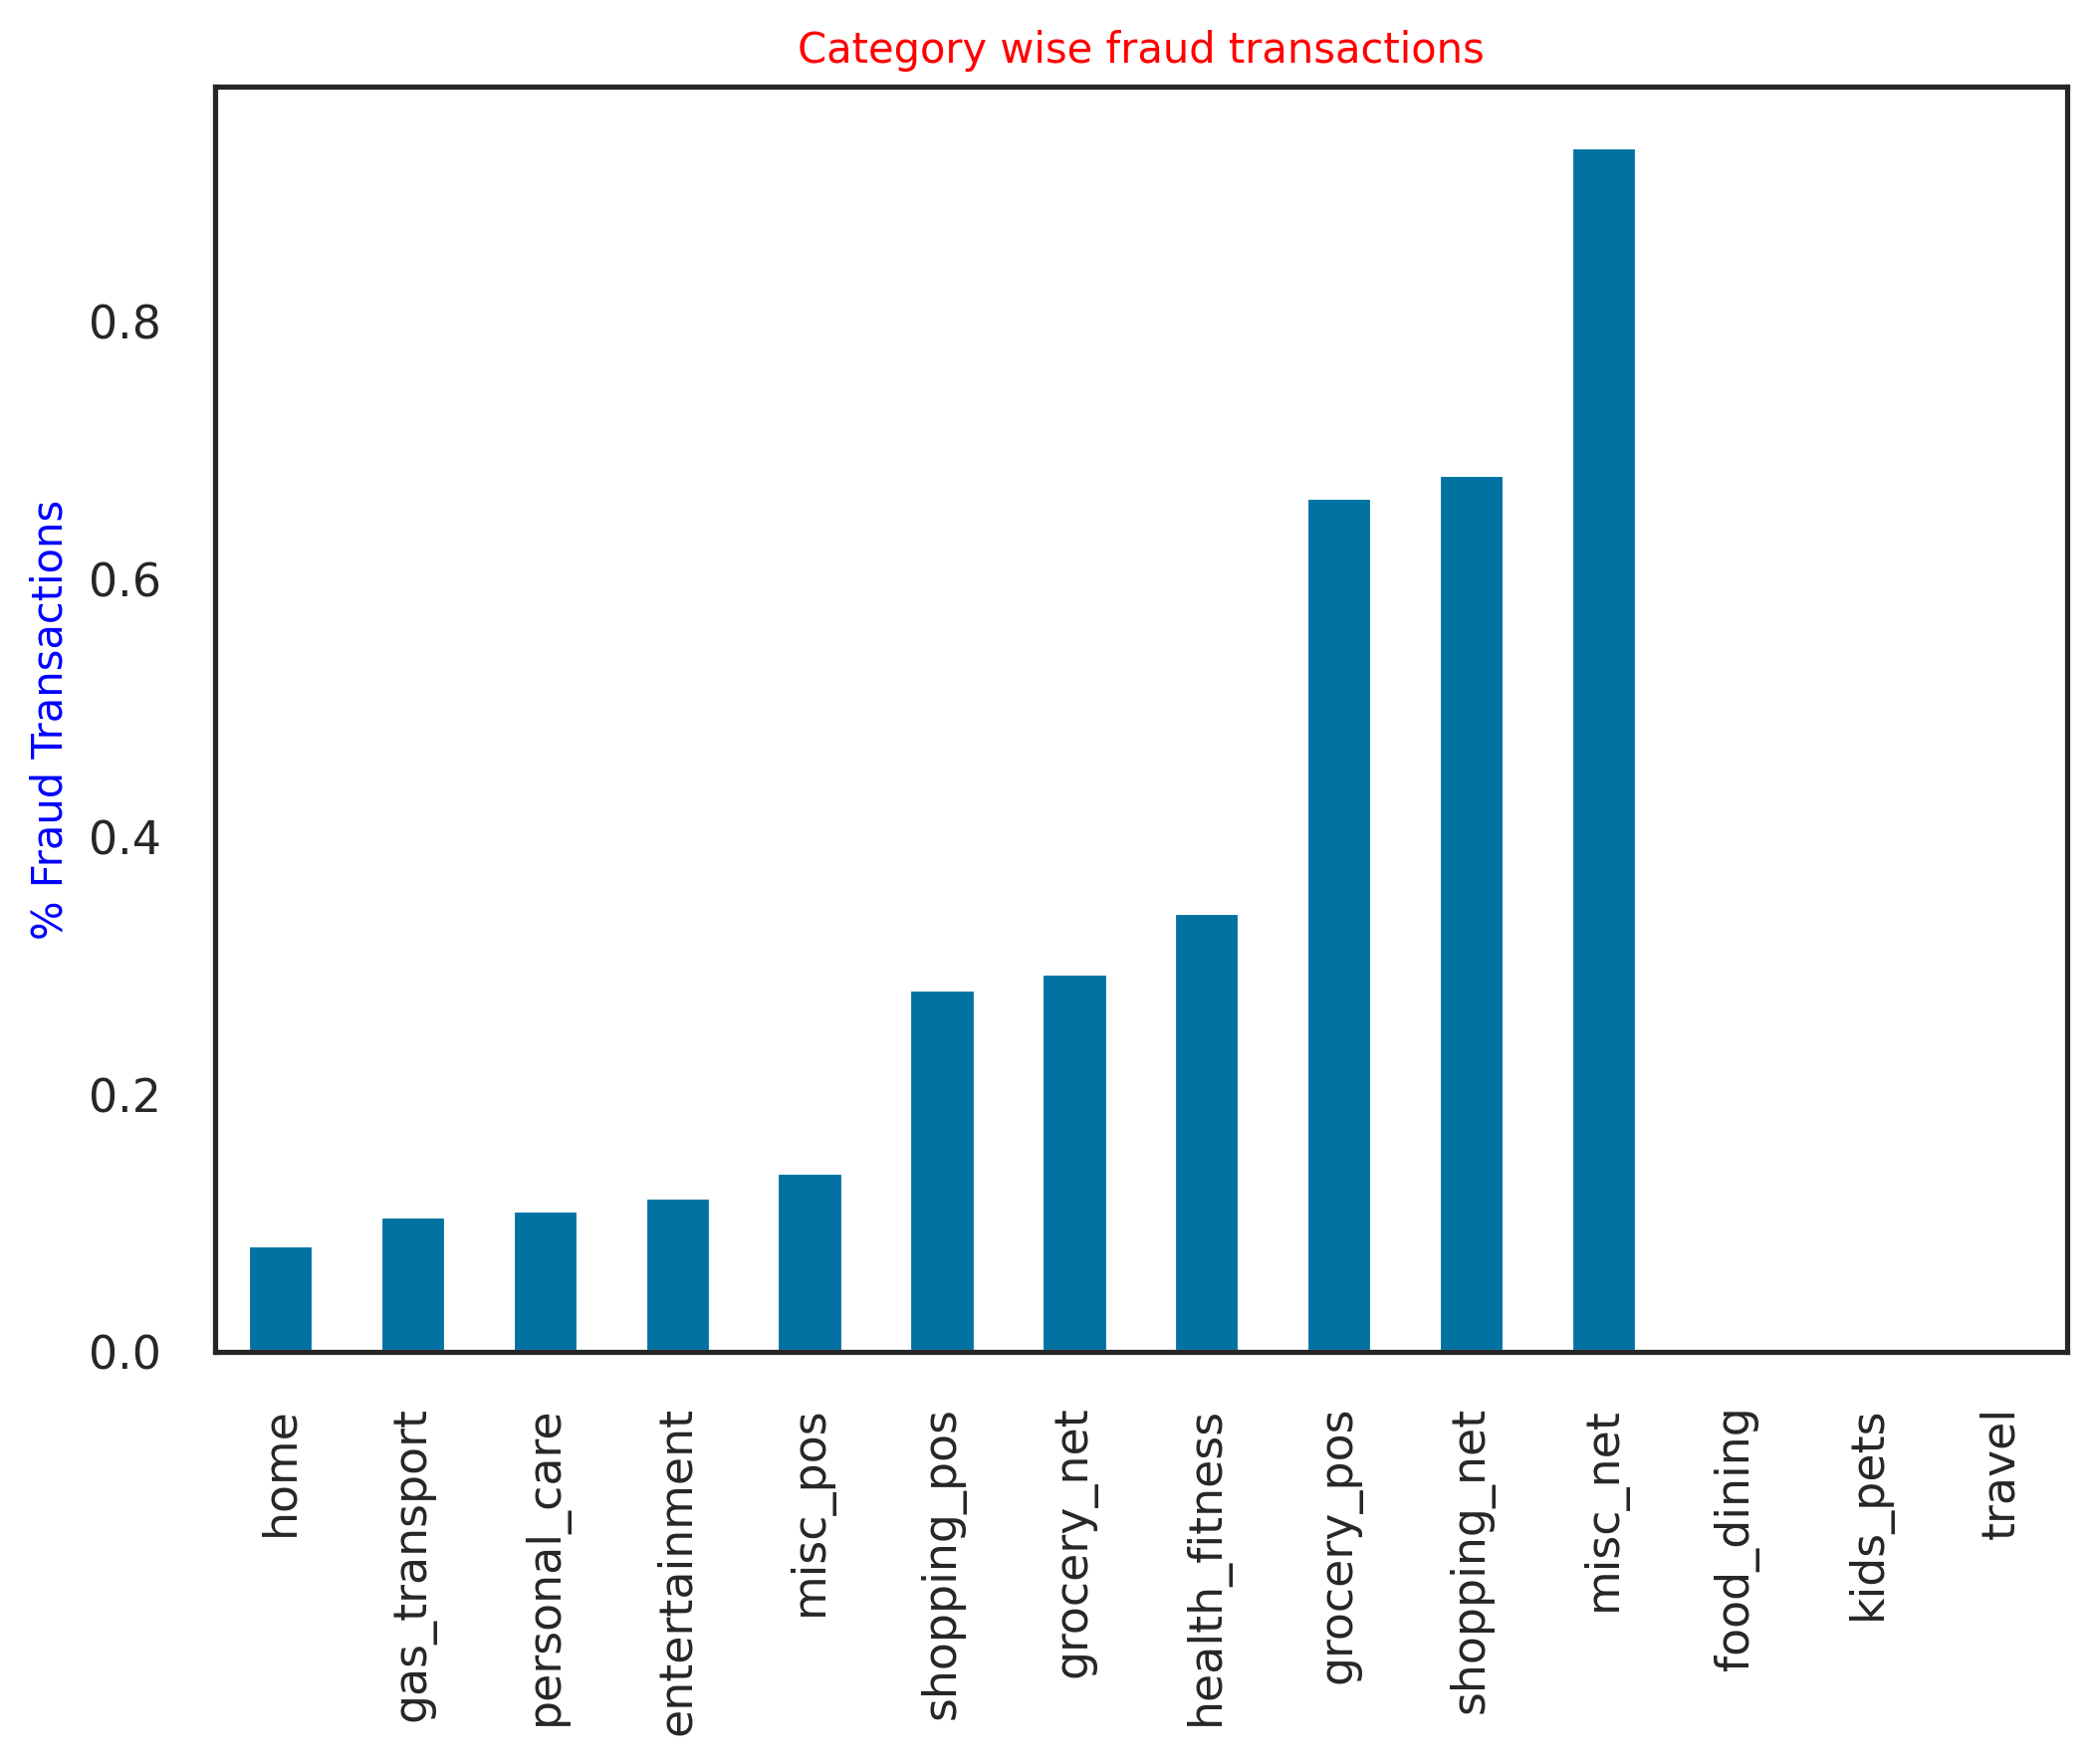

In [44]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [45]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

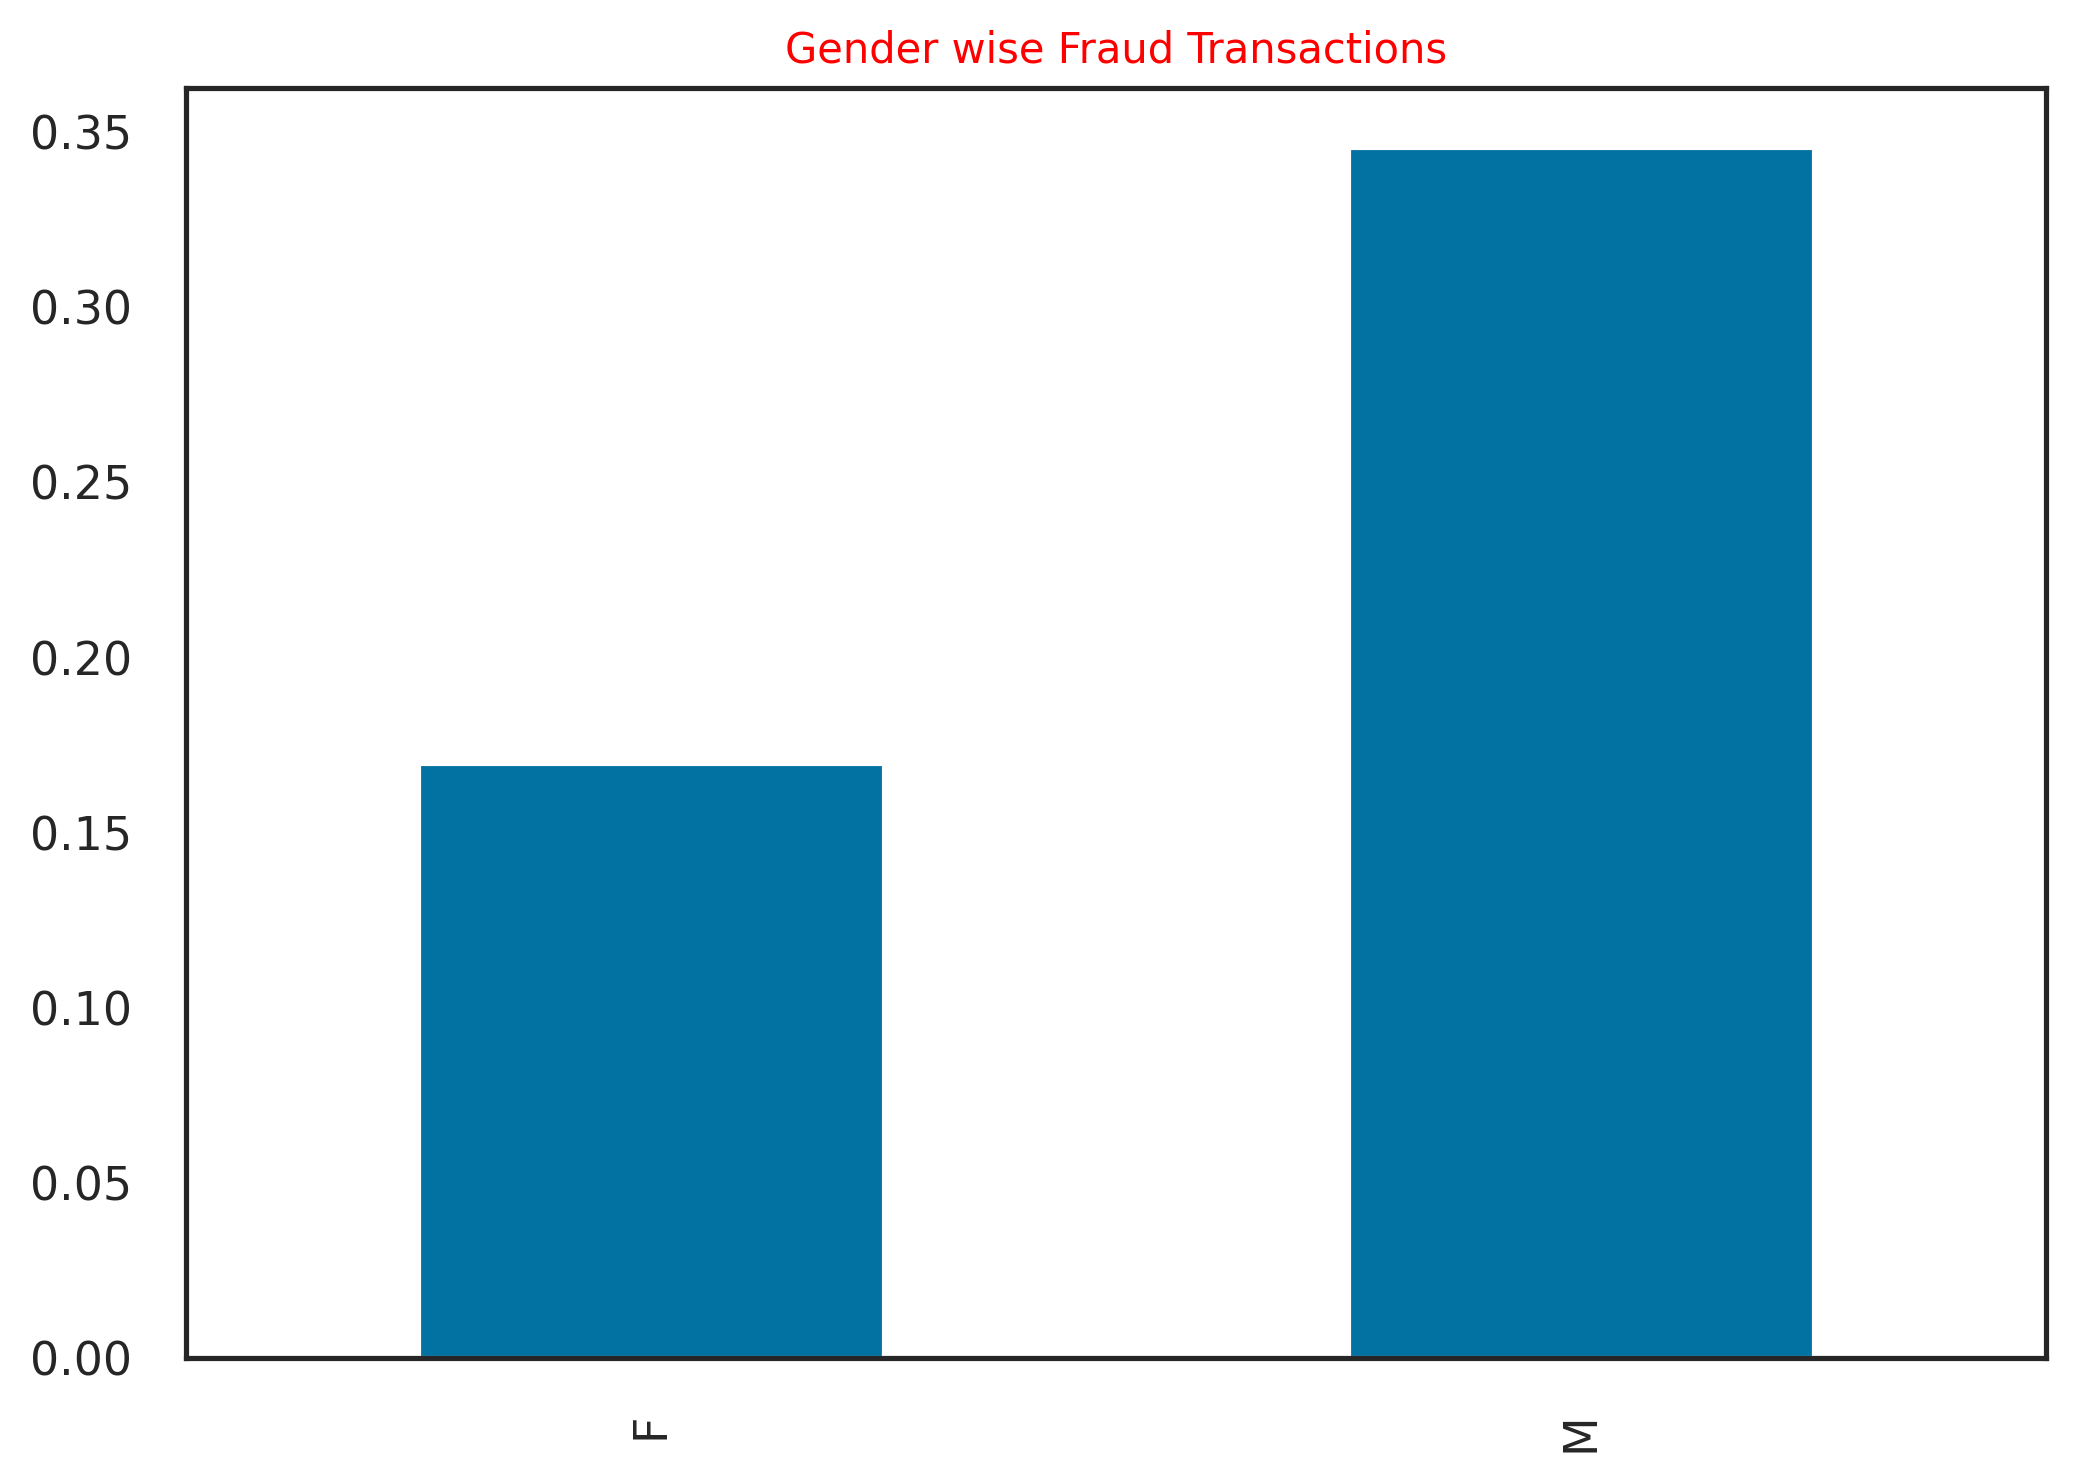

In [46]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = fraud.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = fraud[fraud.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [47]:
# Transforming alphabetic gender data into numeric to be processed by the model
fraud.gender = fraud.gender.map({'M': 1, "F": 0})
fraud_test.gender = fraud_test.gender.map({'M': 1, "F": 0})

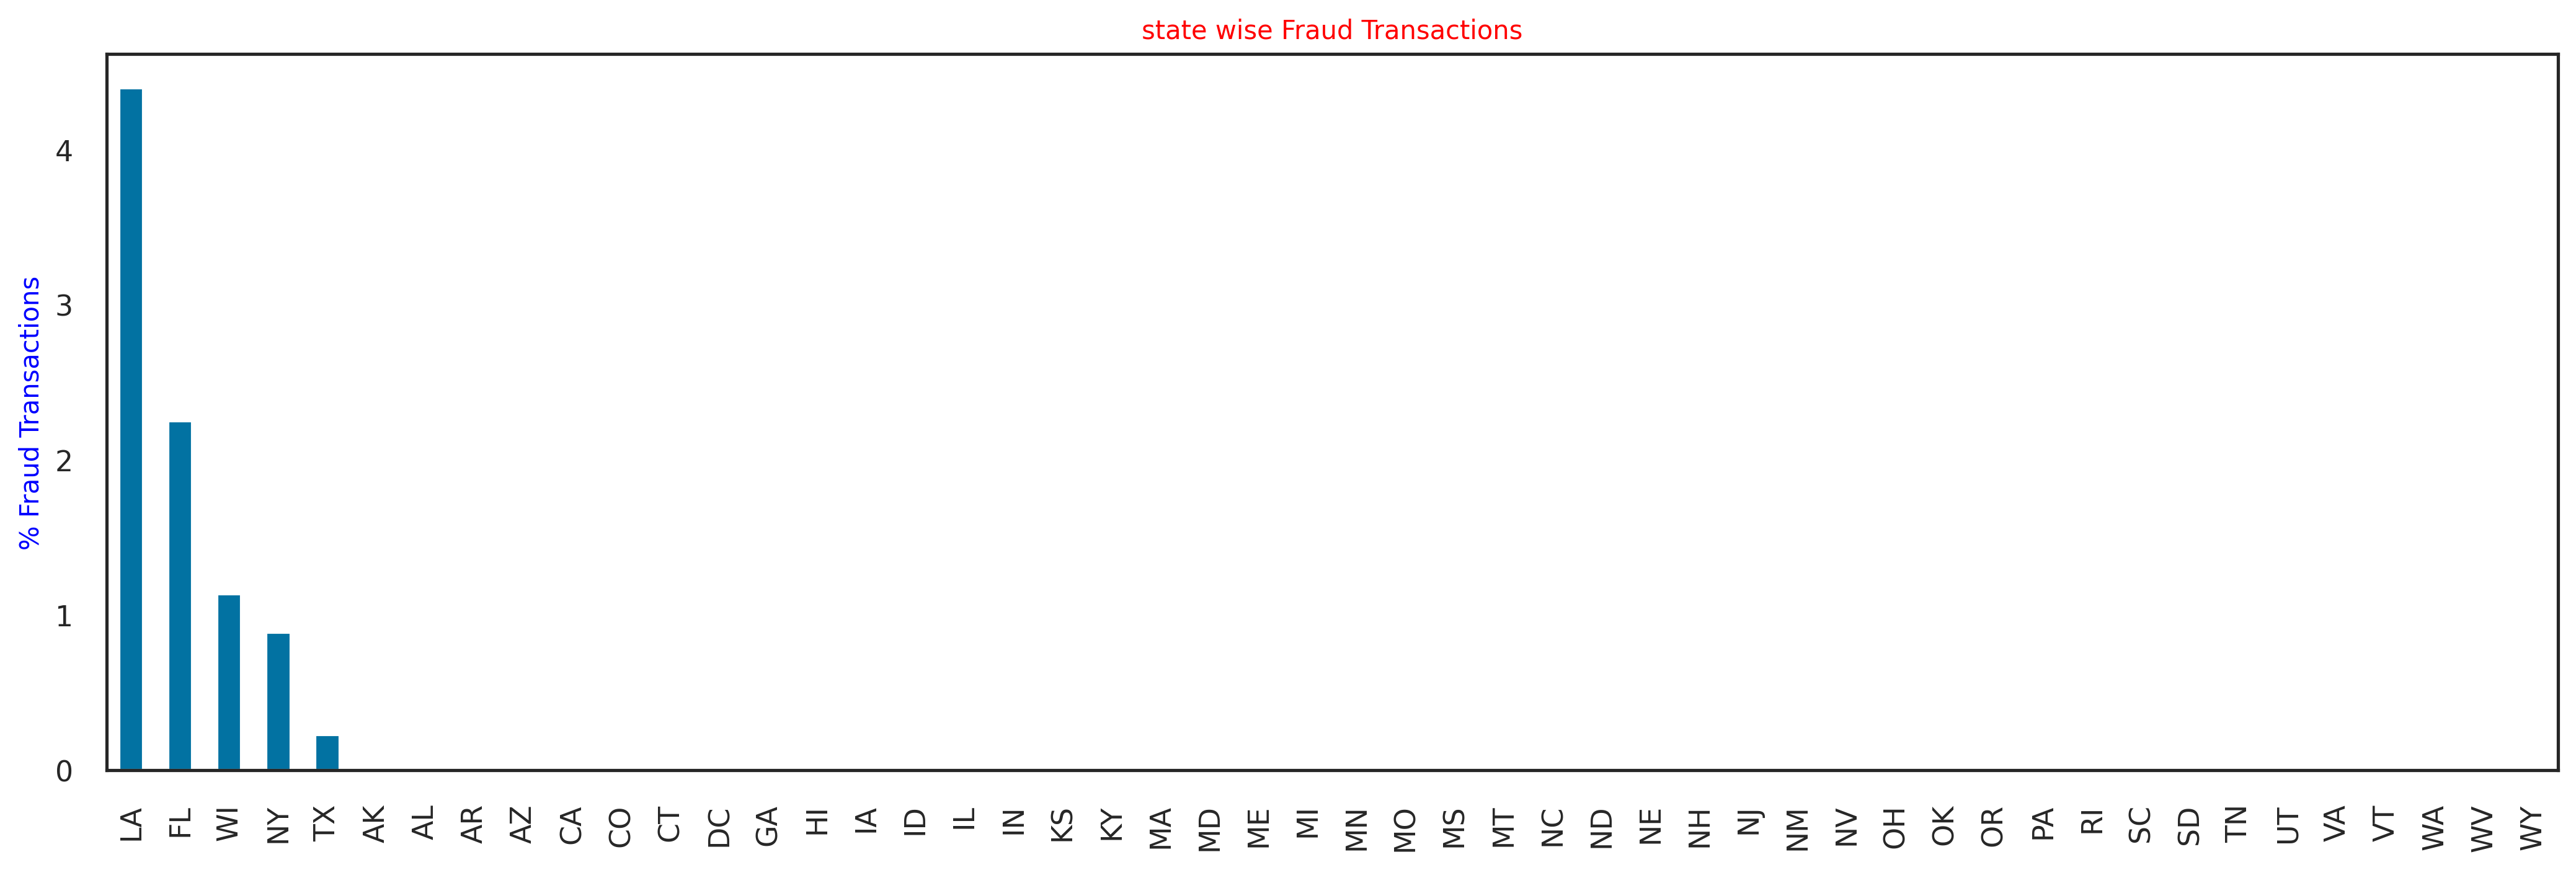

In [48]:
# state Vs fraud
# Percent distribution of fraud based on State
plt.figure(figsize = (17,5))
state_tran_total = fraud.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = fraud[fraud.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()

In [58]:
fraud_perc.sort_values(ascending=False).head()

Public relations officer       75.000000
Herbalist                      26.666667
Librarian, public              18.367347
Scientist, research (maths)    13.207547
Cytogeneticist                  3.846154
dtype: float64

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [49]:
# Transforming alphabetic state data into numeric to be processed by the model
fraud.state = label_encoder.fit_transform(fraud.state)
fraud_test.state = label_encoder.fit_transform(fraud_test.state)

In [50]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

Public relations officer                            75.000000
Herbalist                                           26.666667
Librarian, public                                   18.367347
Scientist, research (maths)                         13.207547
Cytogeneticist                                       3.846154
Academic librarian                                        NaN
Accountant, chartered certified                           NaN
Accountant, chartered public finance                      NaN
Accounting technician                                     NaN
Acupuncturist                                             NaN
Administrator                                             NaN
Administrator, arts                                       NaN
Administrator, charities/voluntary organisations          NaN
Administrator, education                                  NaN
Administrator, local government                           NaN
Advertising account executive                             NaN
Advertis

There seems certain jobs that have real high % of fraud transactions.

In [51]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

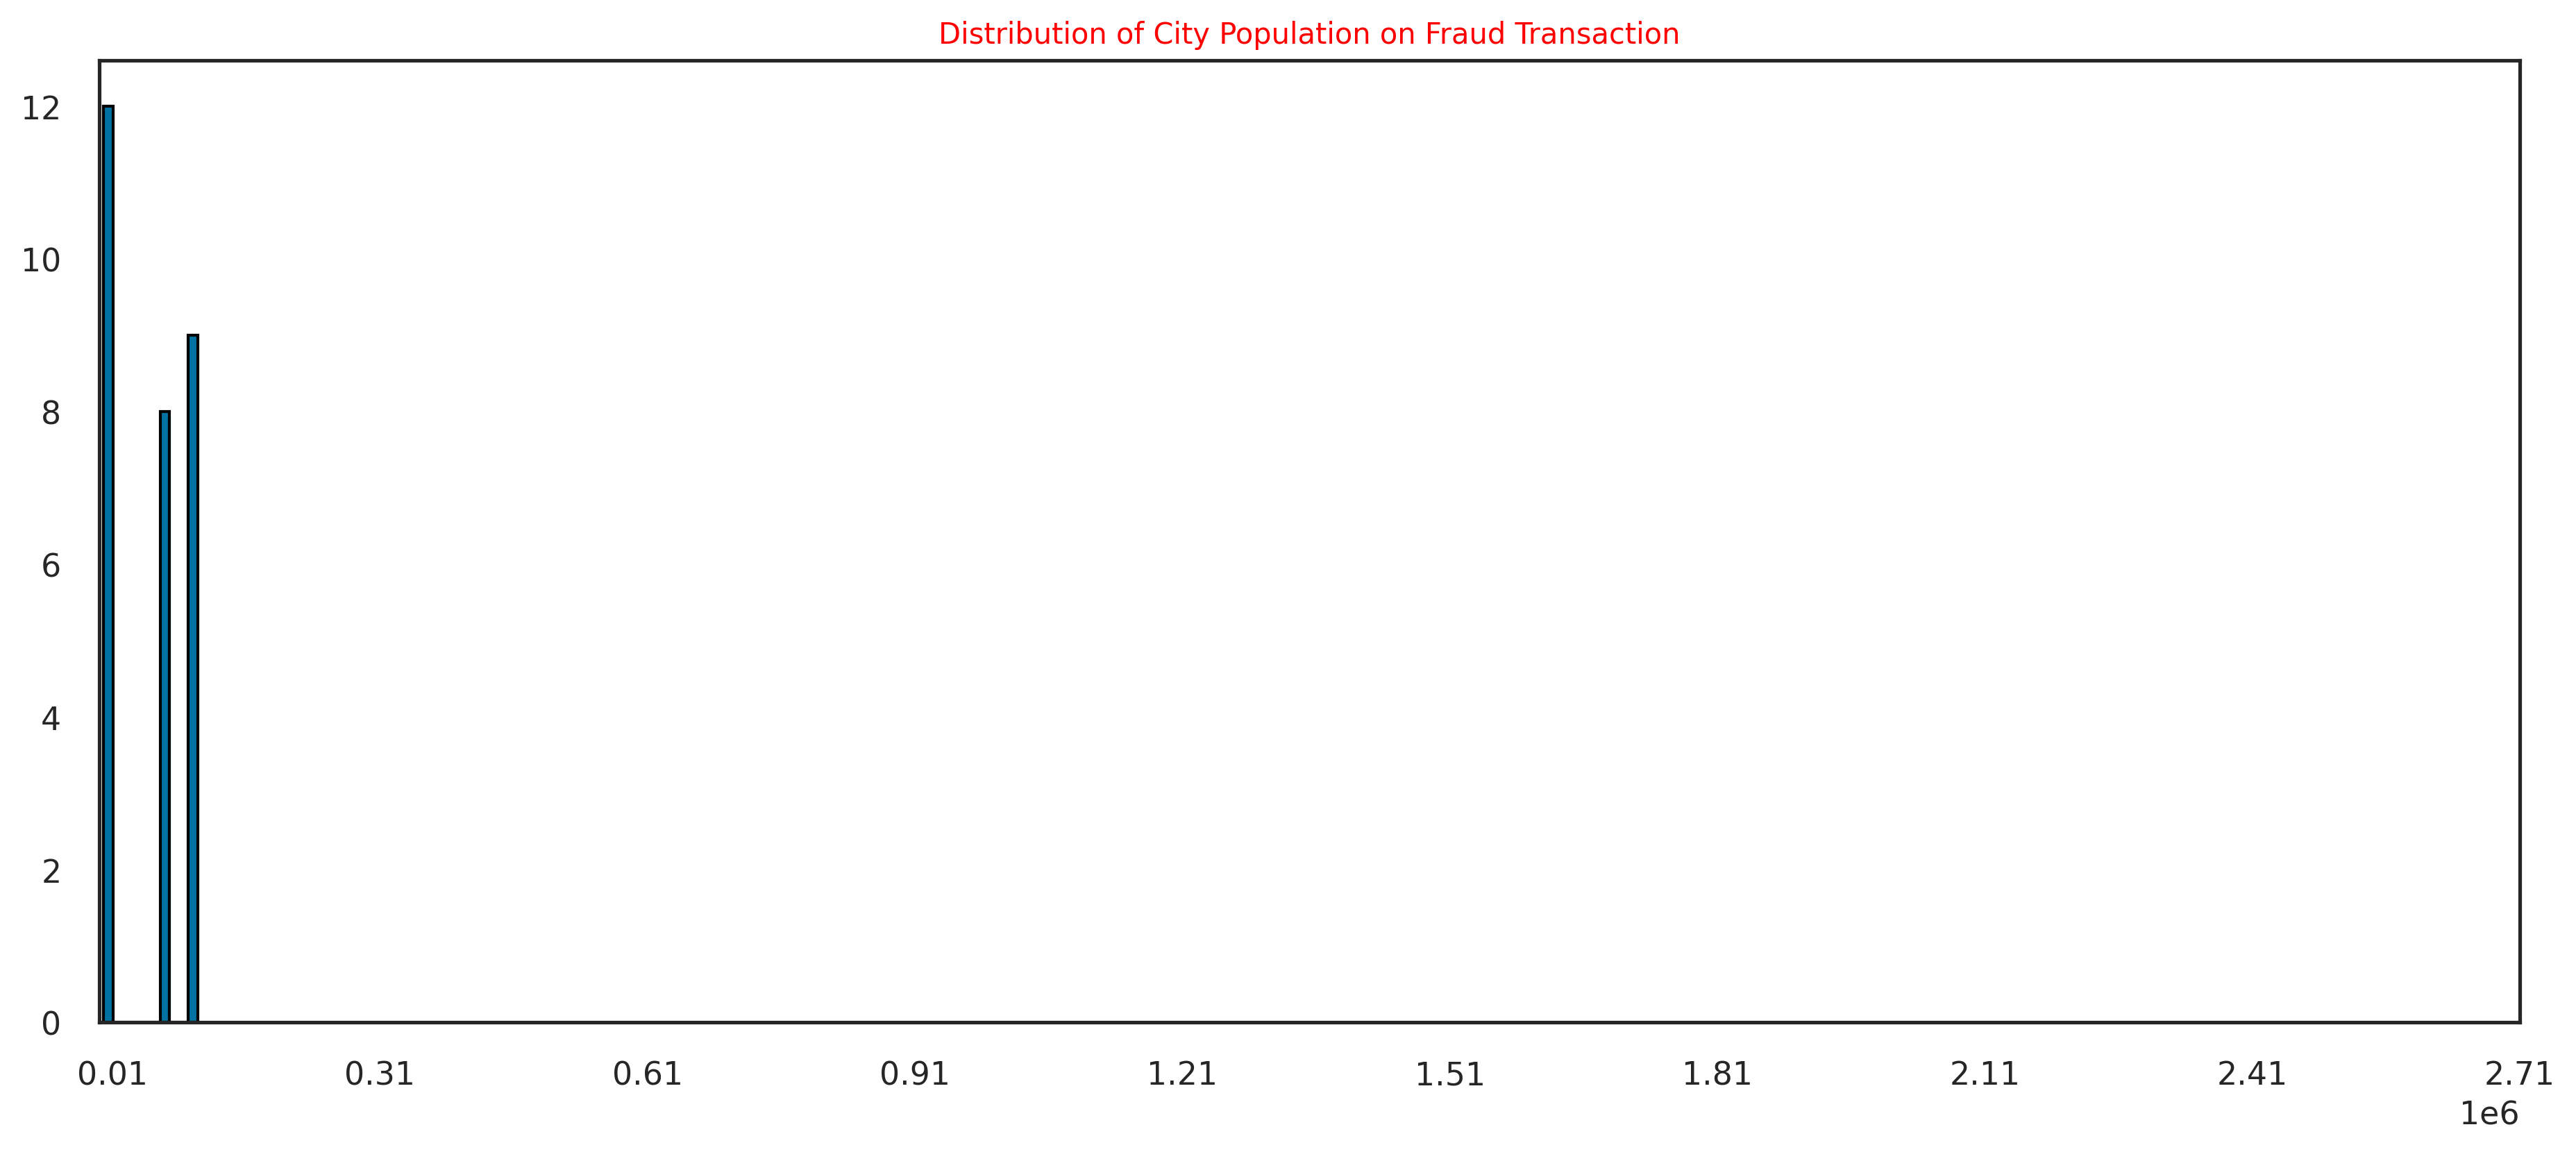

In [52]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

Cities with less population, tends to have more fraud cases.

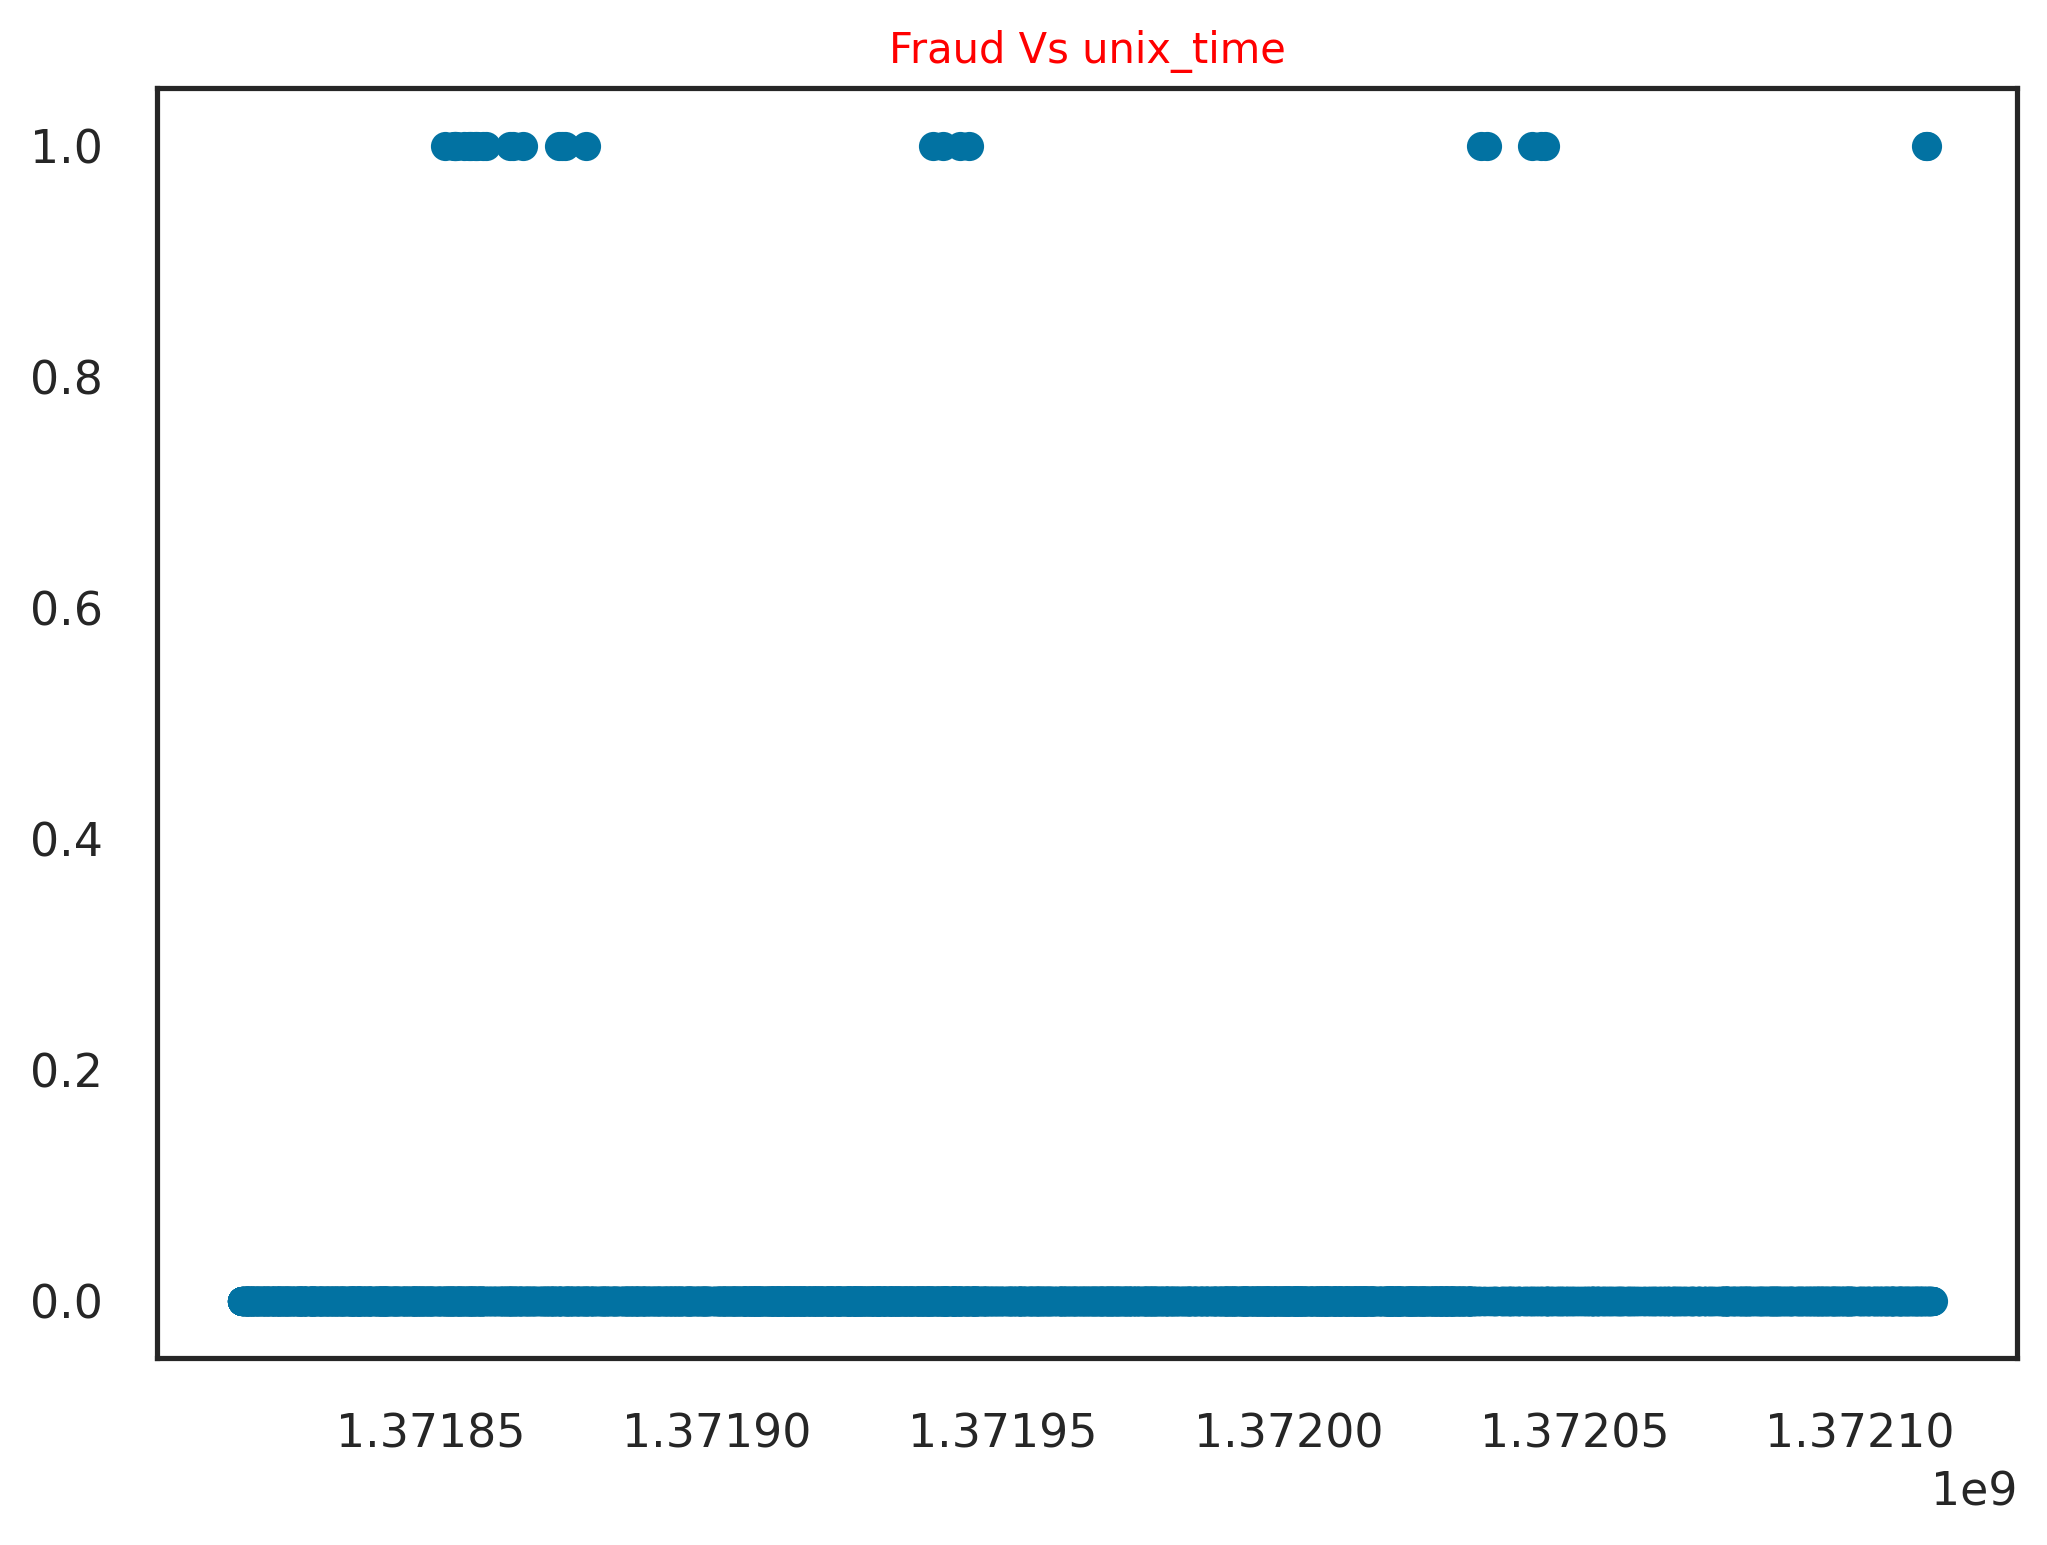

In [53]:
# Fraud Vs Unix Time
plt.title('Fraud Vs unix_time', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.unix_time, fraud.is_fraud)
plt.show()

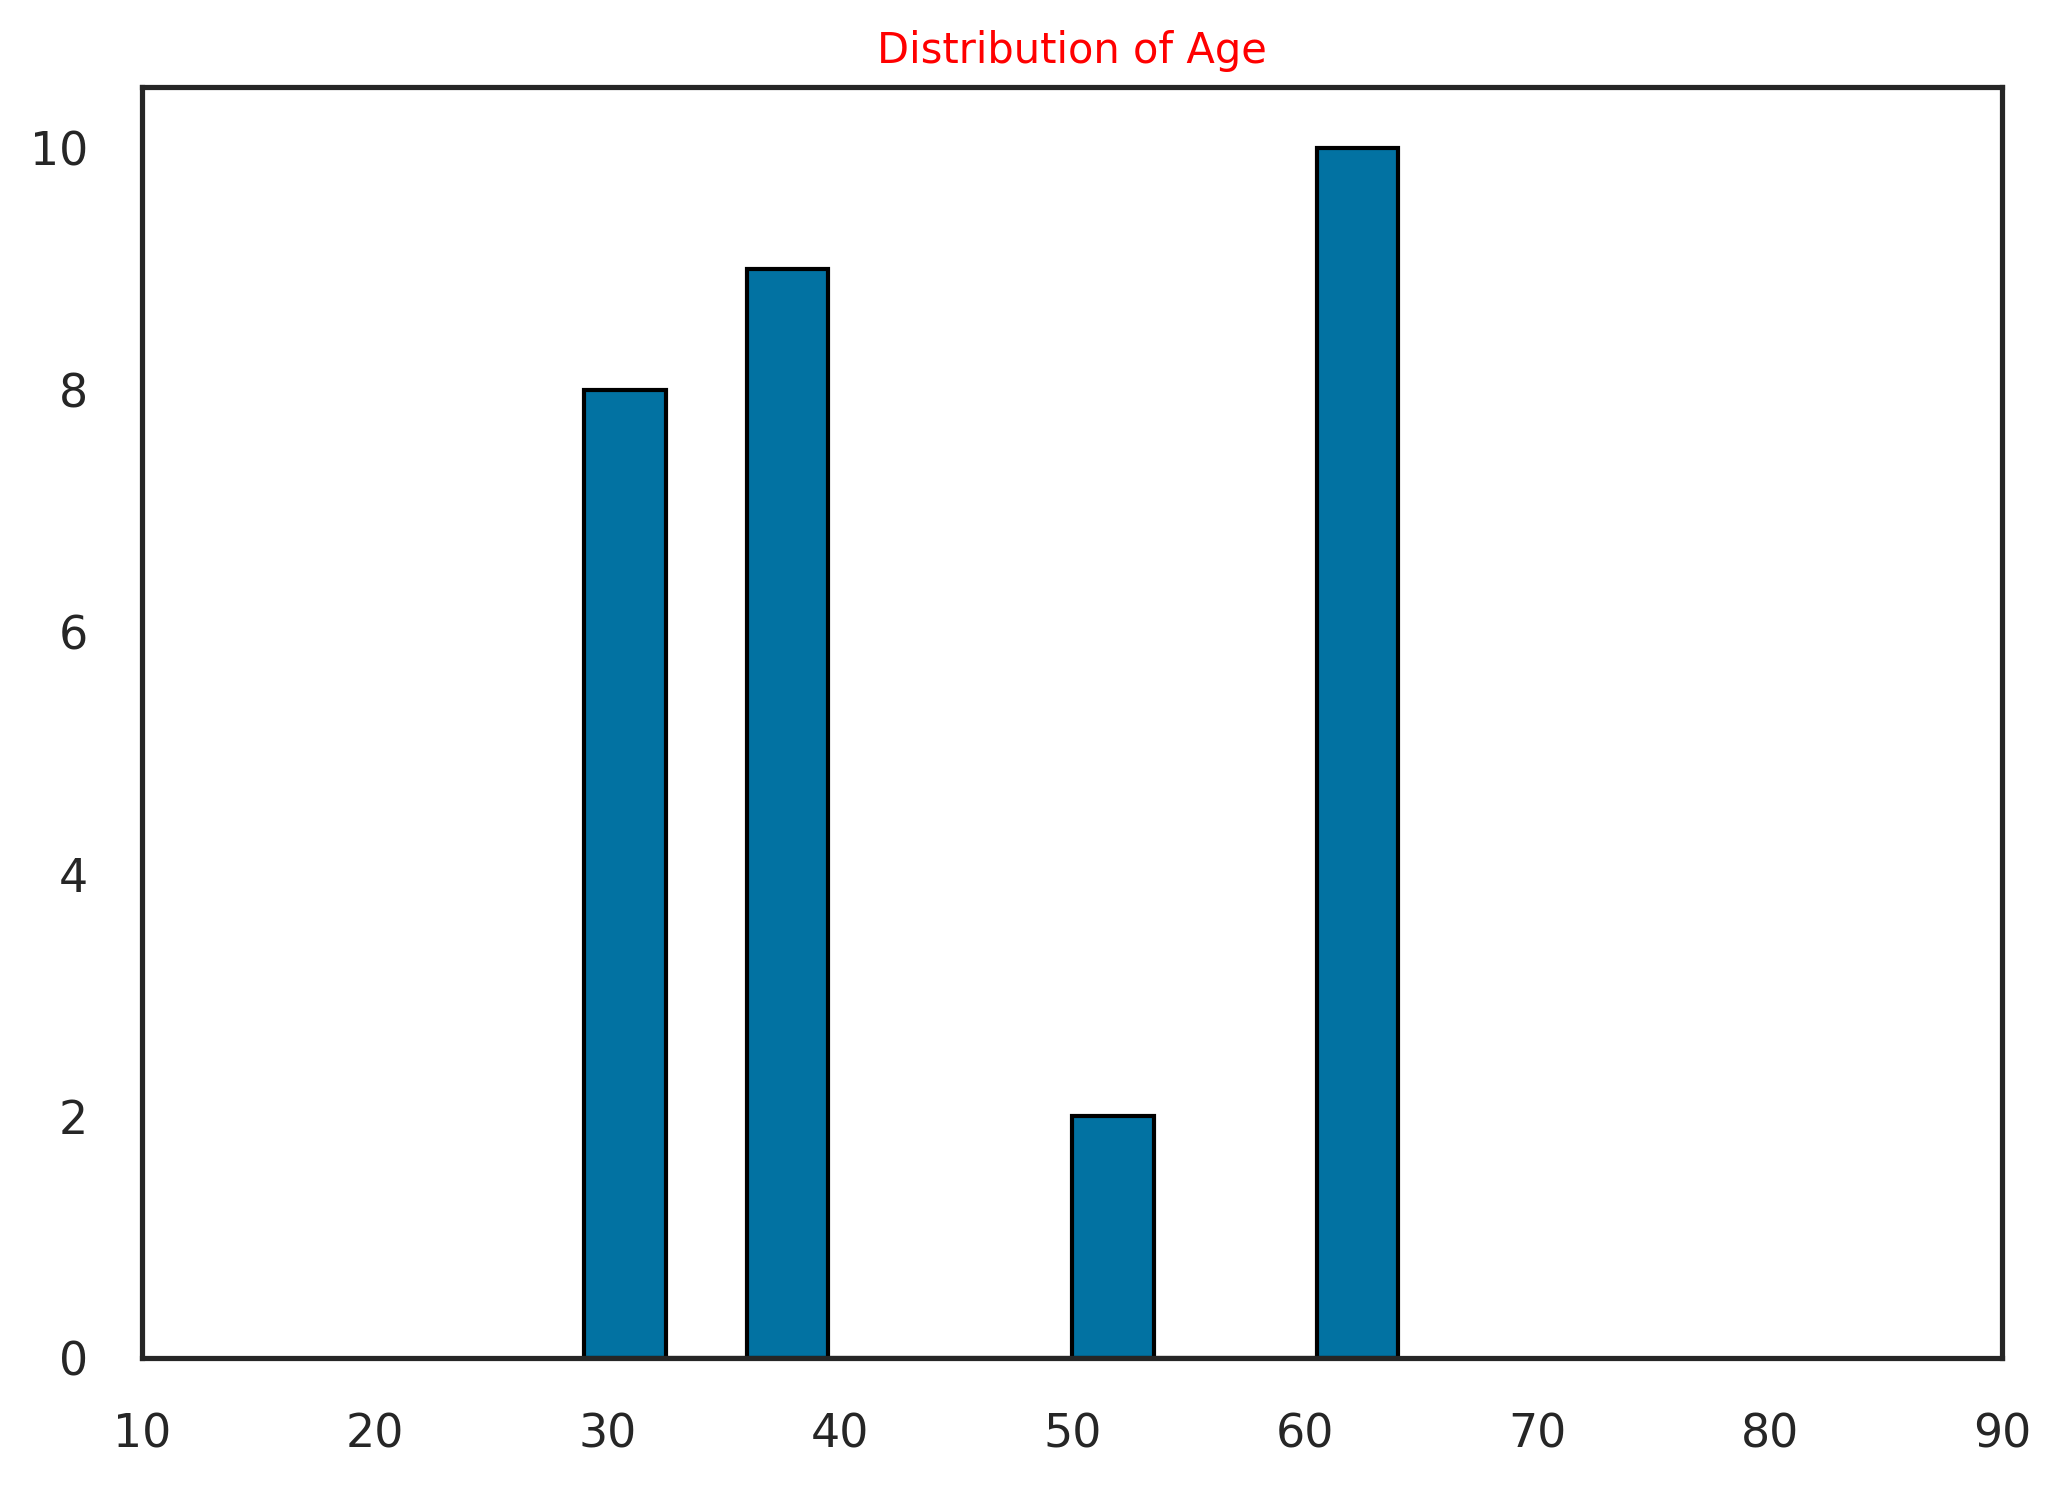

In [59]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [60]:
# Fraud Vs Zip
zip_tran_total = fraud.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = fraud[fraud.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

14141    100.000000
53803     75.000000
32960     64.285714
70726     40.000000
79759     12.500000
1257            NaN
1330            NaN
1535            NaN
1545            NaN
1612            NaN
1843            NaN
1844            NaN
2180            NaN
2630            NaN
2908            NaN
3220            NaN
3452            NaN
3601            NaN
3753            NaN
3774            NaN
3816            NaN
3818            NaN
3858            NaN
3905            NaN
4047            NaN
dtype: float64

As is evident from above stats, there are perticular ZIP codes that have 100% frauds.

In [61]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

42.5200    100.000000
42.5545     75.000000
27.6330     64.285714
30.4590     40.000000
31.8599     12.500000
dtype: float64

As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [62]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-90.3508     75.000000
-80.4031     64.285714
-78.6847     41.176471
-90.9027     40.000000
-102.7413    12.500000
dtype: float64

In [63]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

26.782874    100.0
30.761363    100.0
43.042593    100.0
43.027879    100.0
42.771834    100.0
dtype: float64

In [64]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-102.736390    100.0
-80.914551     100.0
-78.451208     100.0
-78.922416     100.0
-79.023729     100.0
dtype: float64

1. There are multiple demographies - Zip, City, States, Latitudes, Longitudes and Job types that have only Fraud transactions.
2. Even though they have 100% frauds, the number of transactions is very low. For Example State DE had only 9 transactions in 2 years. Hence, it is very less likely to impact the model.

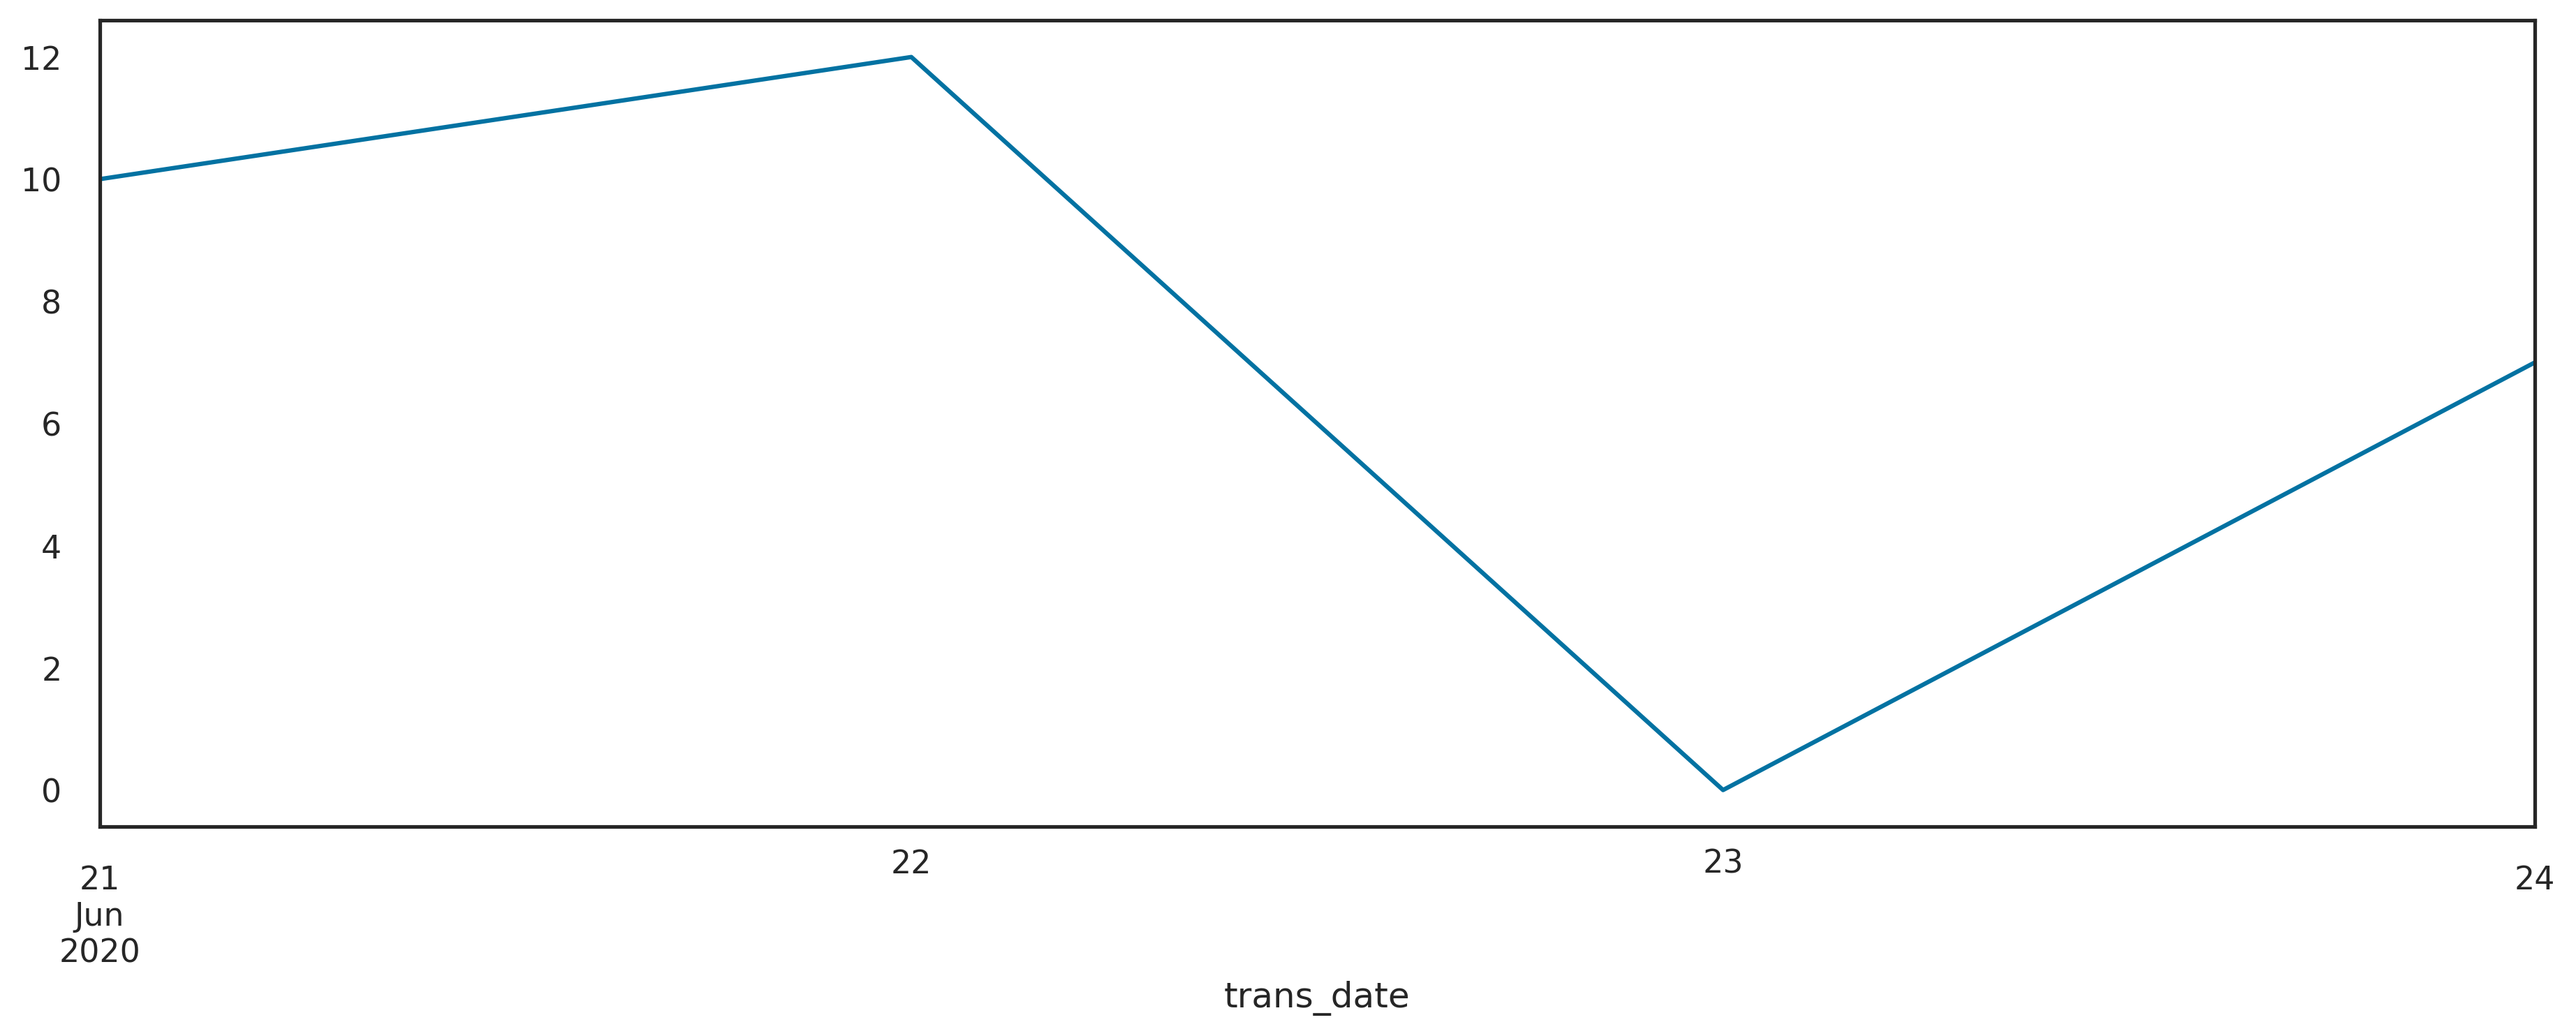

In [65]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

Now its time to change date and time to a format more acceptable for modelling. Before that, lets pull some stats required for Cost sheet. Also, it may be noticed that the train data is for 1.5 years (full 2019 till mid of 2020) and test data is for last 6 months of 2020. This way we will be able to build model on 1.5 year of data and test it on future data and hence check model performance in future. We will do the Cost Benifit analysis on the entire data.

In [66]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

total number of records in file:  23403


In [67]:
print ('Total number of months: ', date.value_counts().size)

Total number of months:  2


In [68]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

Average transactions per month:  11702.0


In [69]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

(23403, 2)

In [70]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

Average fraud transactions per month:  38.0


In [71]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

Average amount per fraud transaction:  536.01


In [72]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

max fraud amount :  1254.27


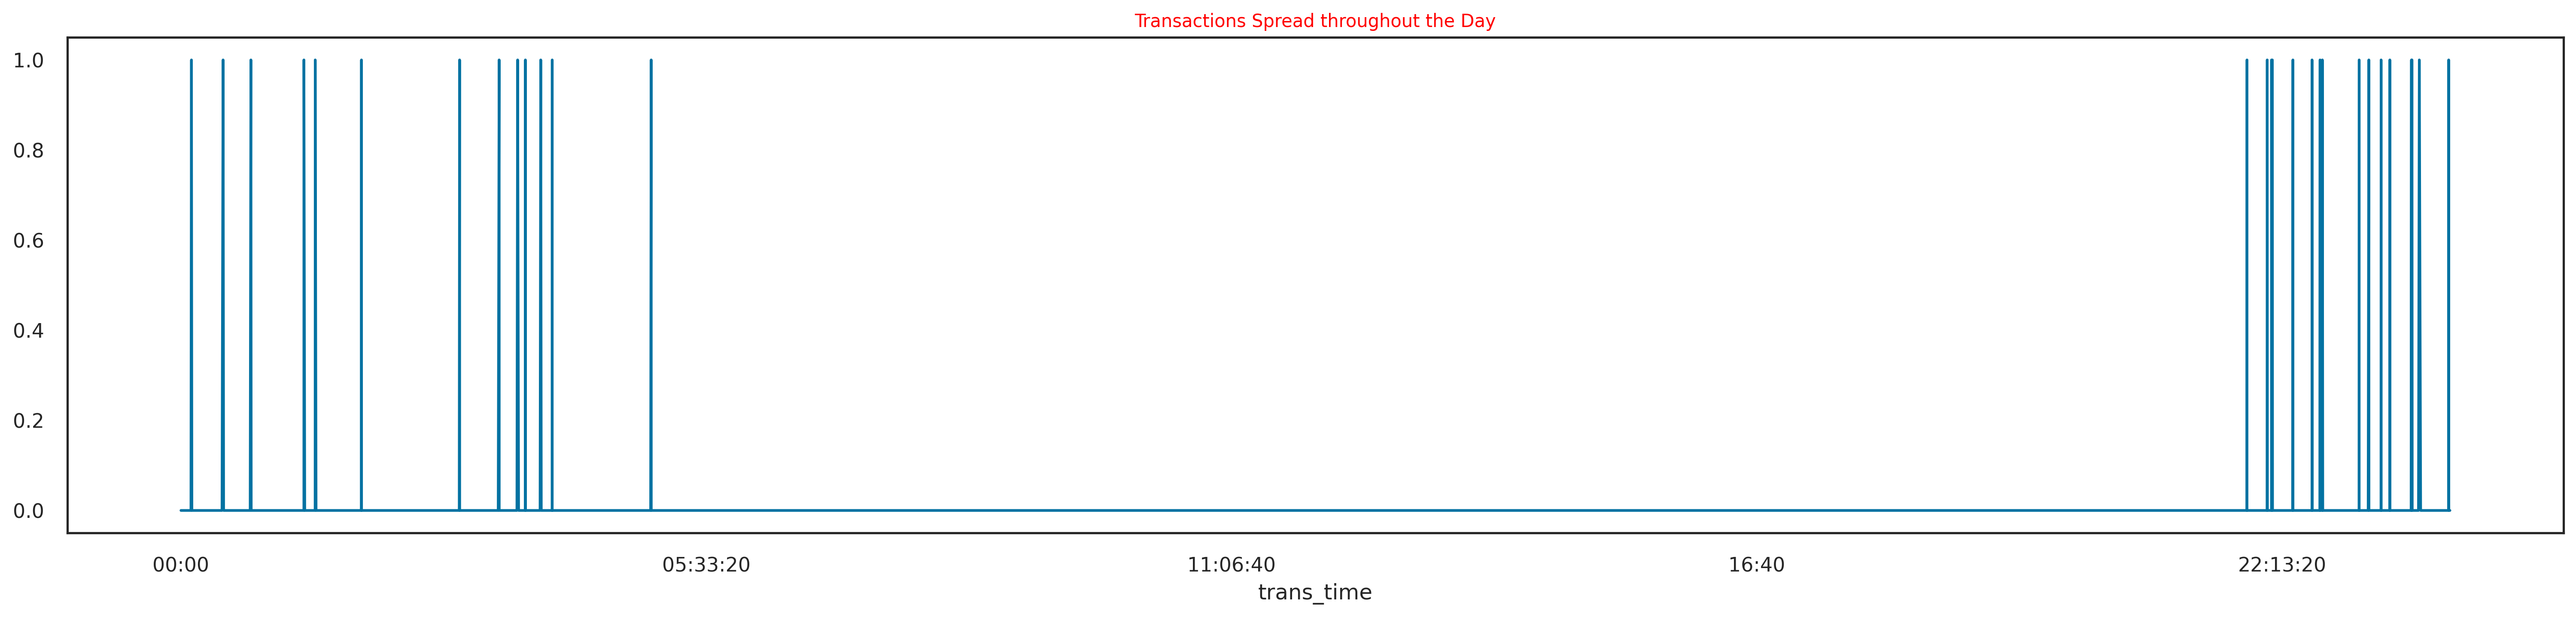

In [73]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

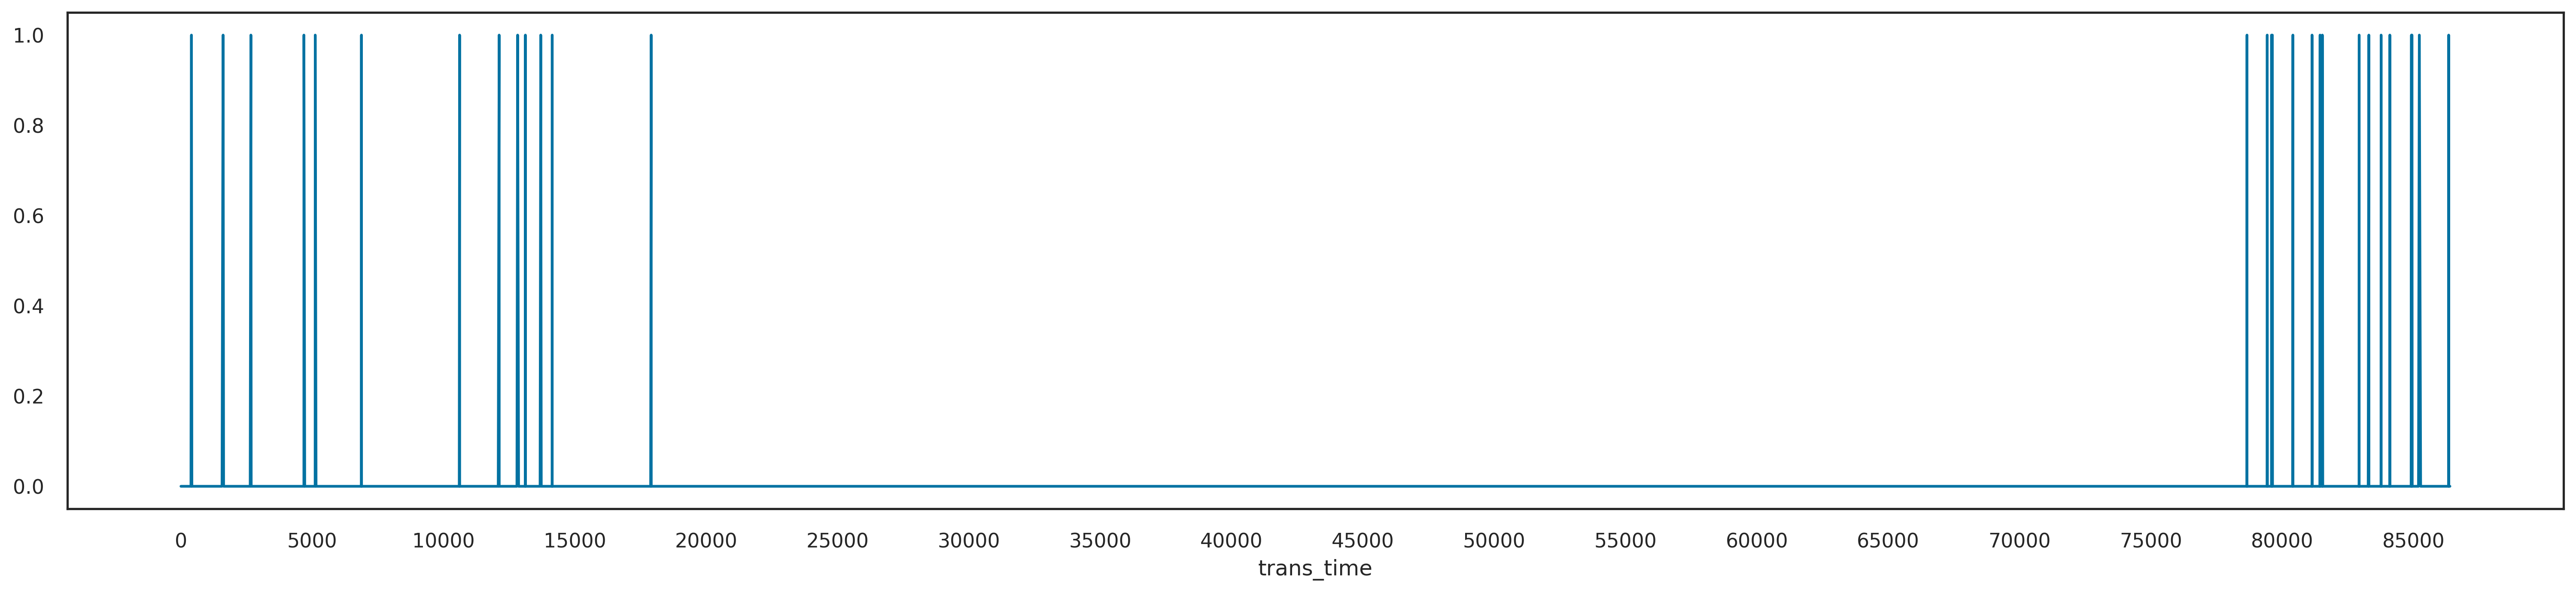

In [74]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [75]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [76]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

train :  (11697, 18)
test :  (11706, 18)


In [77]:
fraud

merchant  category    amt  gender  city  state    zip      lat  \
0           319        10   2.86       1   157     39  29209  33.9659   
1           591        10  29.84       0    16     43  84002  40.3207   
2           611         5  41.28       0    61     33  11710  40.6729   
3           222         9  60.05       1   751      8  32780  28.5697   
4           292        13   3.19       1   246     21  49632  44.2529   
...         ...       ...    ...     ...   ...    ...    ...      ...   
11692        40         0  11.58       1   271     44  24340  36.7779   
11693       670        12   9.84       1   512     41  37132  35.8596   
11694       628         5  37.98       1    65      1  35022  33.3224   
11695         0         0  75.39       1   410     37  15056  40.5662   
11696       627        12   8.37       0   329     34  44233  41.2419   

           long  city_pop  job     unix_time  merch_lat  merch_long  is_fraud  \
0      -80.9355    333497  274  1.371817e+09  33.986391  -81.200714       0.0   
1     -110.4360       302  390  1.371817e+09  39.450498 -109.960431       0.0   
2      -73.5365     34496  258  1.371817e+09  40.495810  -74.196111       0.0   
3      -80.8191     54767  405  1.371817e+09  28.812398  -80.883061       0.0   
4      -85.0170      1126  195  1.371817e+09  44.959148  -85.884734       0.0   
...         ...       ...  ...           ...        ...         ...       ...   
11692  -81.7676      5657   84  1.372112e+09  36.914435  -82.552026       0.0   
11693  -86.4210    158701  246  1.372113e+09  35.709589  -85.437614       0.0   
11694  -86.9657     71463  370  1.372113e+09  33.249667  -87.785931       0.0   
11695  -80.2099      1140    8  1.372113e+09  40.149897  -79.834239       0.0   
11696  -81.7453      7646  278           NaN        NaN         NaN       NaN   

       trans_date  trans_time  age  
0          737597       44065   55  
1          737597       44073   33  
2          737597       44093   52  
3          737597       44115   35  
4          737597       44117   67  
...           ...         ...  ...  
11692      737600       80495   36  
11693      737600       80573   45  
11694      737600       80624   34  
11695      737600       80666   37  
11696      737600       80698   34  

[11697 rows x 18 columns]

In [78]:
corr = fraud.corr()
corr.style.background_gradient(cmap='coolwarm')

# Advance EDA (optional)

In [79]:
df_train = fraud
df_test = fraud_test

In [96]:
df_train.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)

> **Convert datetime columns**   
*transaction_time* and *dob* should be in pd.datetime format and we also convert unix_time to exact timestamp

In [114]:
df_train.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)

In [98]:
from datetime import datetime

# Apply function utcfromtimestamp and drop column unix_time
df_train['time'] = df_train['unix_time'].apply(lambda x: datetime.utcfromtimestamp(x) if not pd.isna(x) else pd.NaT)
df_train.drop('unix_time', axis=1, inplace=True)

# Add column 'hour_of_day' based on 'time' column
df_train['hour_of_day'] = df_train['time'].dt.hour


In [99]:
df_train[['time','hour_of_day']]

time  hour_of_day
0     2013-06-21 12:14:25         12.0
1     2013-06-21 12:14:33         12.0
2     2013-06-21 12:14:53         12.0
3     2013-06-21 12:15:15         12.0
4     2013-06-21 12:15:17         12.0
...                   ...          ...
11692 2013-06-24 22:21:35         22.0
11693 2013-06-24 22:22:53         22.0
11694 2013-06-24 22:23:44         22.0
11695 2013-06-24 22:24:26         22.0
11696                 NaT          NaN

[11697 rows x 2 columns]

> **Convert dtypes**   
Credit card number should be integer, let's change.

In [105]:
# Verify column names
print(df_train.columns)

Index(['merchant', 'category', 'amount(usd)', 'gender', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'age', 'time', 'hour_of_day'],
      dtype='object')


In [101]:
np.round(df_train.describe(), 2)

merchant  category  amount(usd)    gender      city     state  \
count  11697.00  11697.00     11697.00  11697.00  11697.00  11697.00   
mean     345.24      6.40        66.24      0.45    418.30     25.81   
std      202.79      3.91       124.02      0.50    241.39     14.15   
min        0.00      0.00         1.00      0.00      0.00      0.00   
25%      167.00      3.00         9.20      0.00    206.00     14.00   
50%      347.00      6.00        43.77      0.00    412.00     26.00   
75%      521.00     10.00        79.77      1.00    633.00     37.00   
max      692.00     13.00      3396.84      1.00    834.00     49.00   

            zip       lat      long    city_pop       job  merch_lat  \
count  11697.00  11697.00  11697.00    11697.00  11697.00   11696.00   
mean   48583.52     38.49    -90.03    94717.94    239.45      38.48   
std    26706.80      5.11     13.58   322201.00    134.47       5.14   
min     1257.00     20.03   -165.67       23.00      0.00      19.16   
25%    26237.00     34.51    -96.62      782.00    121.00      34.63   
50%    48034.00     39.34    -86.97     2691.00    237.00      39.33   
75%    72011.00     42.01    -80.18    21635.00    358.00      42.00   
max    99783.00     65.69    -67.95  2906700.00    474.00      65.95   

       merch_long  is_fraud  trans_date  trans_time       age  hour_of_day  
count    11696.00  11696.00    11697.00    11697.00  11697.00     11696.00  
mean       -90.03      0.00   737598.45    50650.71     48.66        13.57  
std         13.59      0.05        0.94    23366.25     17.41         6.48  
min       -166.46      0.00   737597.00        0.00     18.00         0.00  
25%        -96.60      0.00   737598.00    33288.00     36.00         9.00  
50%        -87.24      0.00   737598.00    54313.00     47.00        15.00  
75%        -80.27      0.00   737599.00    69479.00     59.00        19.00  
max        -67.12      1.00   737600.00    86393.00     98.00        23.00

In [128]:
df_train.dtypes

merchant                int64
category                int64
amount(usd)           float64
gender                  int64
city                    int64
state                   int64
zip                     int64
lat                   float64
long                  float64
city_pop                int64
job                     int64
merch_lat             float64
merch_long            float64
is_fraud              float64
trans_date              int64
trans_time              int64
age                     int64
time           datetime64[ns]
hour_of_day           float64
dtype: object

<ipython-input-127-13b28625db19>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-127-13b28625db19>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

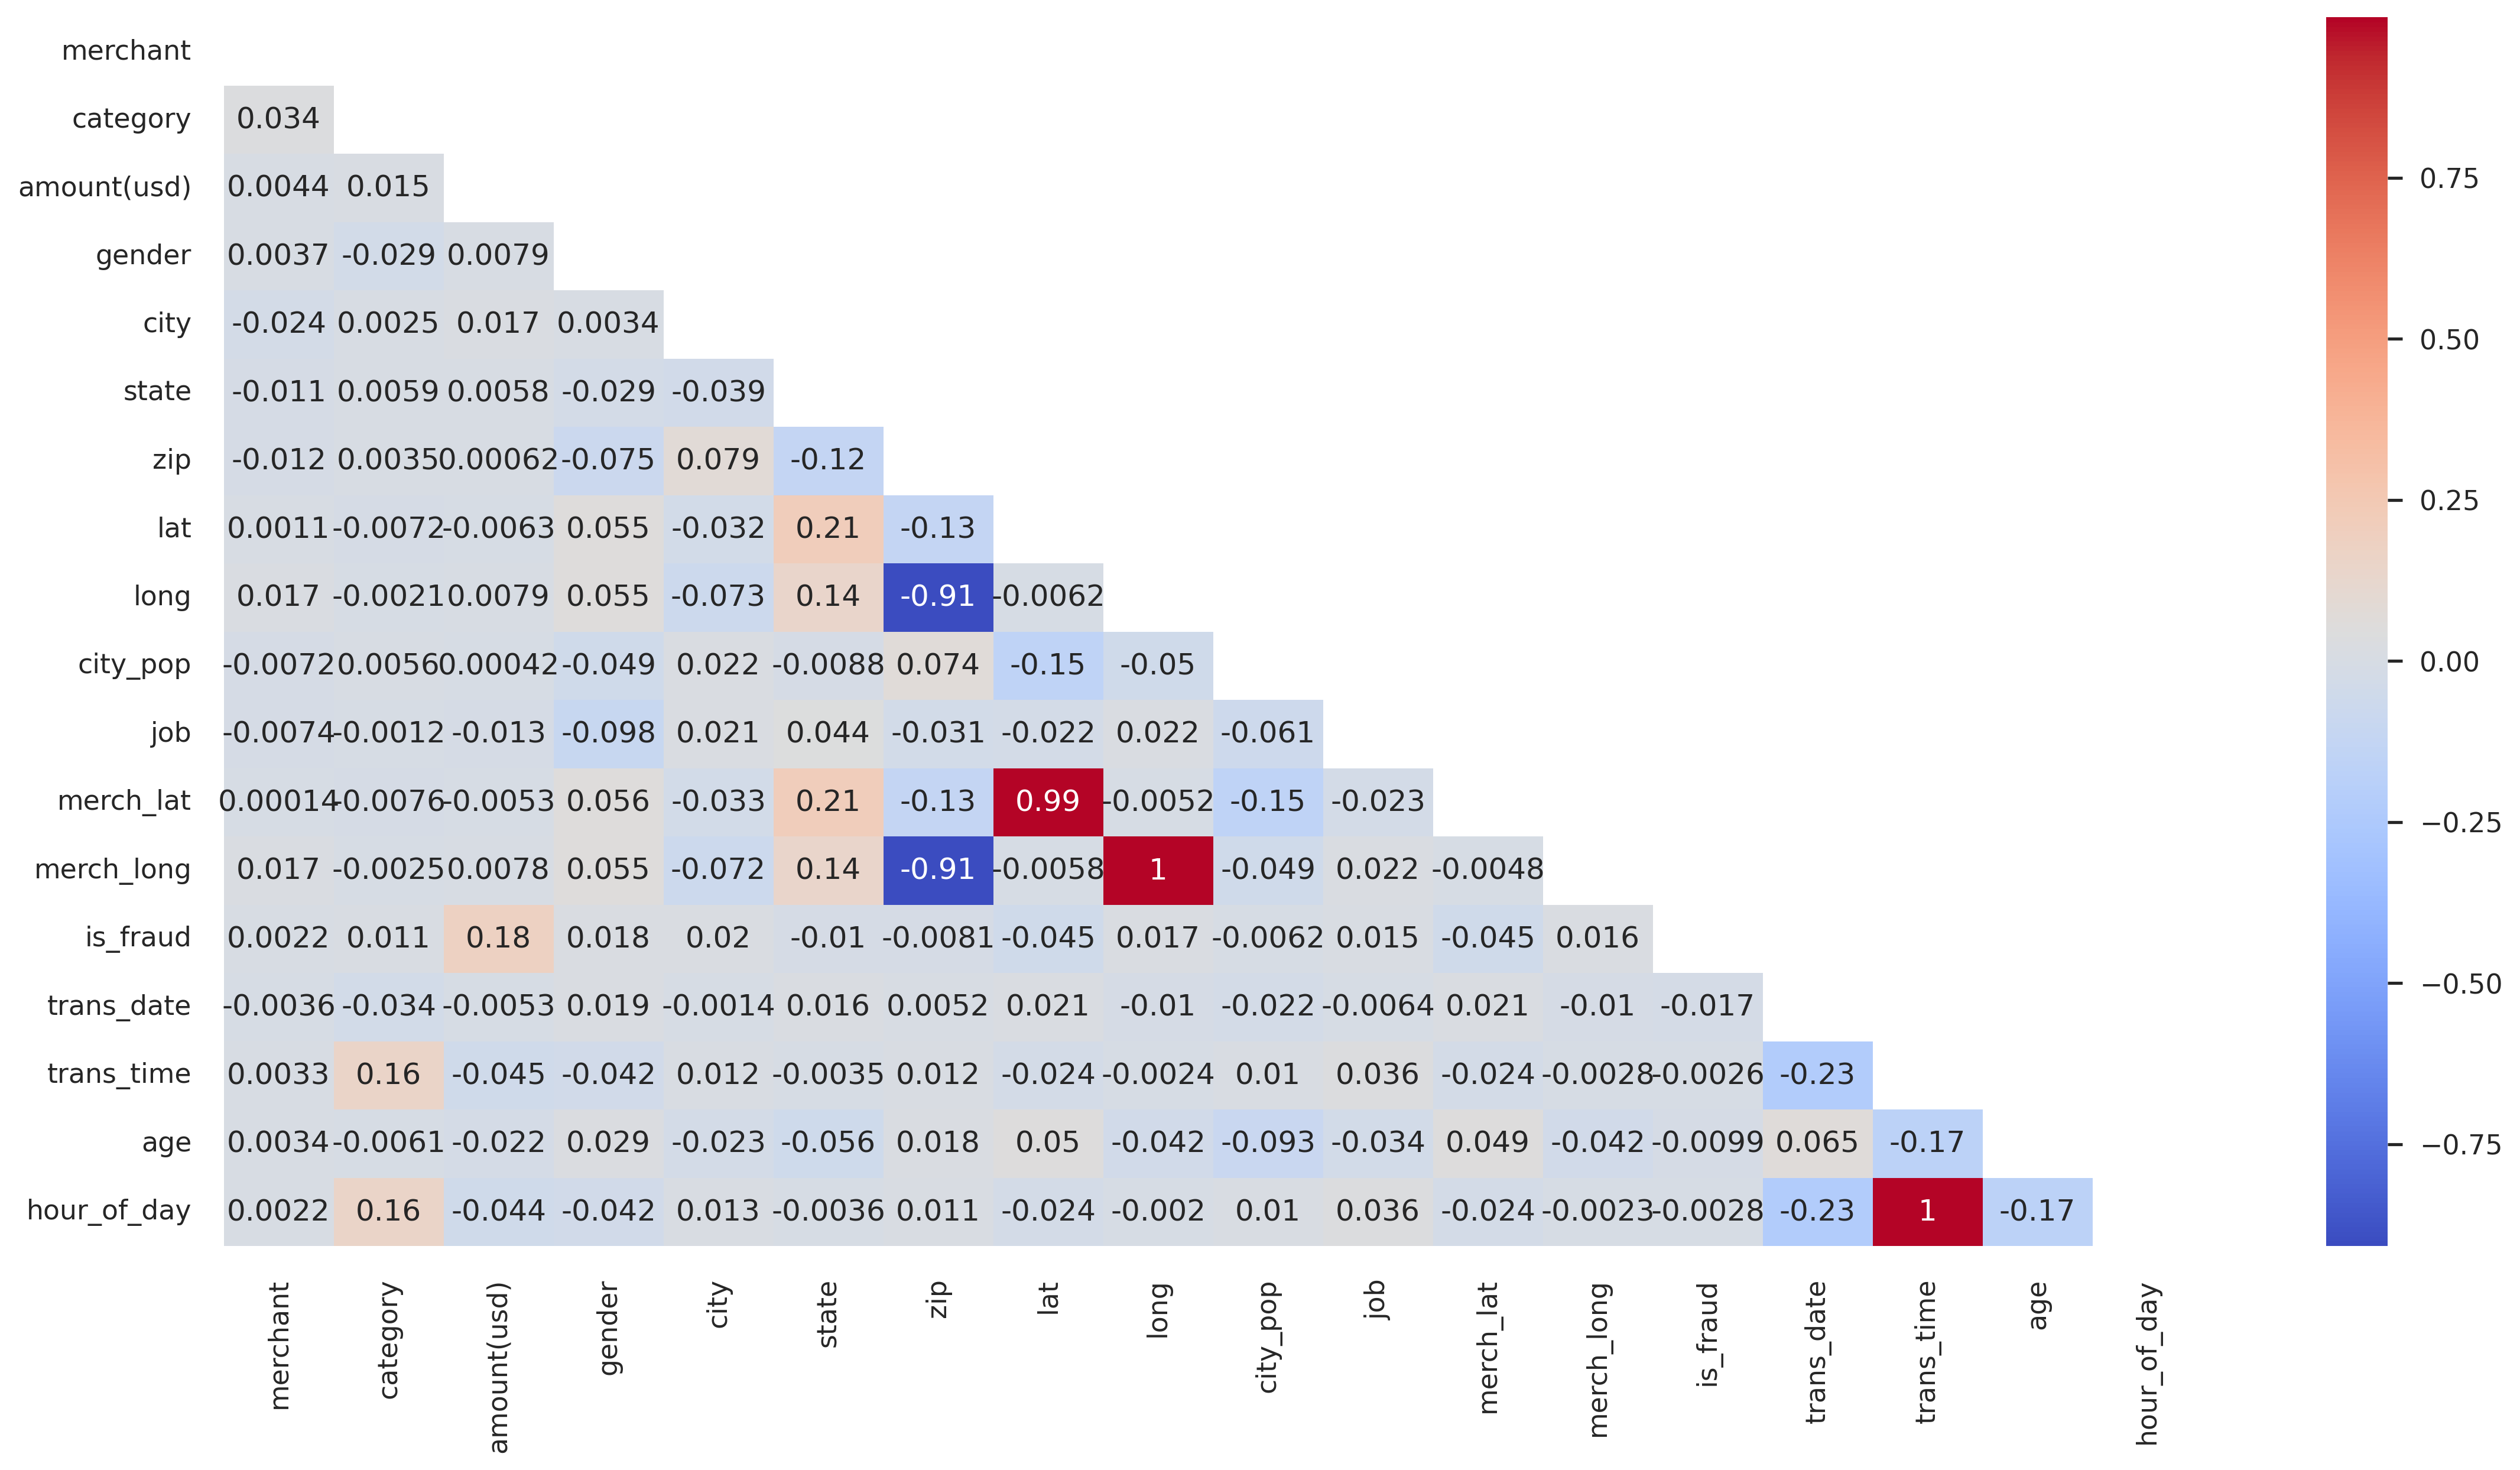

In [127]:
%matplotlib inline
fig = plt.figure(figsize=(18,9))
mask = np.triu(np.ones_like(df_train.corr()))
sns.heatmap(df_train.corr(), mask=mask, cmap='coolwarm', annot=True)

Next, build the model to predict Fraud Transactions(label "1")   
Target: The higher **F1-Score** for label 1, the better the model!

# Model Building

In [129]:
fraud

merchant  category  amount(usd)  gender  city  state    zip      lat  \
0           319        10         2.86       1   157     39  29209  33.9659   
1           591        10        29.84       0    16     43  84002  40.3207   
2           611         5        41.28       0    61     33  11710  40.6729   
3           222         9        60.05       1   751      8  32780  28.5697   
4           292        13         3.19       1   246     21  49632  44.2529   
...         ...       ...          ...     ...   ...    ...    ...      ...   
11692        40         0        11.58       1   271     44  24340  36.7779   
11693       670        12         9.84       1   512     41  37132  35.8596   
11694       628         5        37.98       1    65      1  35022  33.3224   
11695         0         0        75.39       1   410     37  15056  40.5662   
11696       627        12         8.37       0   329     34  44233  41.2419   

           long  city_pop  job  merch_lat  merch_long  is_fraud  trans_date  \
0      -80.9355    333497  274  33.986391  -81.200714       0.0      737597   
1     -110.4360       302  390  39.450498 -109.960431       0.0      737597   
2      -73.5365     34496  258  40.495810  -74.196111       0.0      737597   
3      -80.8191     54767  405  28.812398  -80.883061       0.0      737597   
4      -85.0170      1126  195  44.959148  -85.884734       0.0      737597   
...         ...       ...  ...        ...         ...       ...         ...   
11692  -81.7676      5657   84  36.914435  -82.552026       0.0      737600   
11693  -86.4210    158701  246  35.709589  -85.437614       0.0      737600   
11694  -86.9657     71463  370  33.249667  -87.785931       0.0      737600   
11695  -80.2099      1140    8  40.149897  -79.834239       0.0      737600   
11696  -81.7453      7646  278        NaN         NaN       NaN      737600   

       trans_time  age                time  hour_of_day  
0           44065   55 2013-06-21 12:14:25         12.0  
1           44073   33 2013-06-21 12:14:33         12.0  
2           44093   52 2013-06-21 12:14:53         12.0  
3           44115   35 2013-06-21 12:15:15         12.0  
4           44117   67 2013-06-21 12:15:17         12.0  
...           ...  ...                 ...          ...  
11692       80495   36 2013-06-24 22:21:35         22.0  
11693       80573   45 2013-06-24 22:22:53         22.0  
11694       80624   34 2013-06-24 22:23:44         22.0  
11695       80666   37 2013-06-24 22:24:26         22.0  
11696       80698   34                 NaT          NaN  

[11697 rows x 19 columns]

In [132]:
# features = ['hour_of_day', 'category', 'amt', 'merchant', 'job']

features = ['merchant', 'category', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long',
        'age', 'trans_date', 'trans_time']

#
# X = df_train[features].set_index("transaction_id")
X = fraud[features]
y = fraud['is_fraud']

print('X shape:{}\ny shape:{}'.format(X.shape,y.shape))

X shape:(11697, 15)
y shape:(11697,)


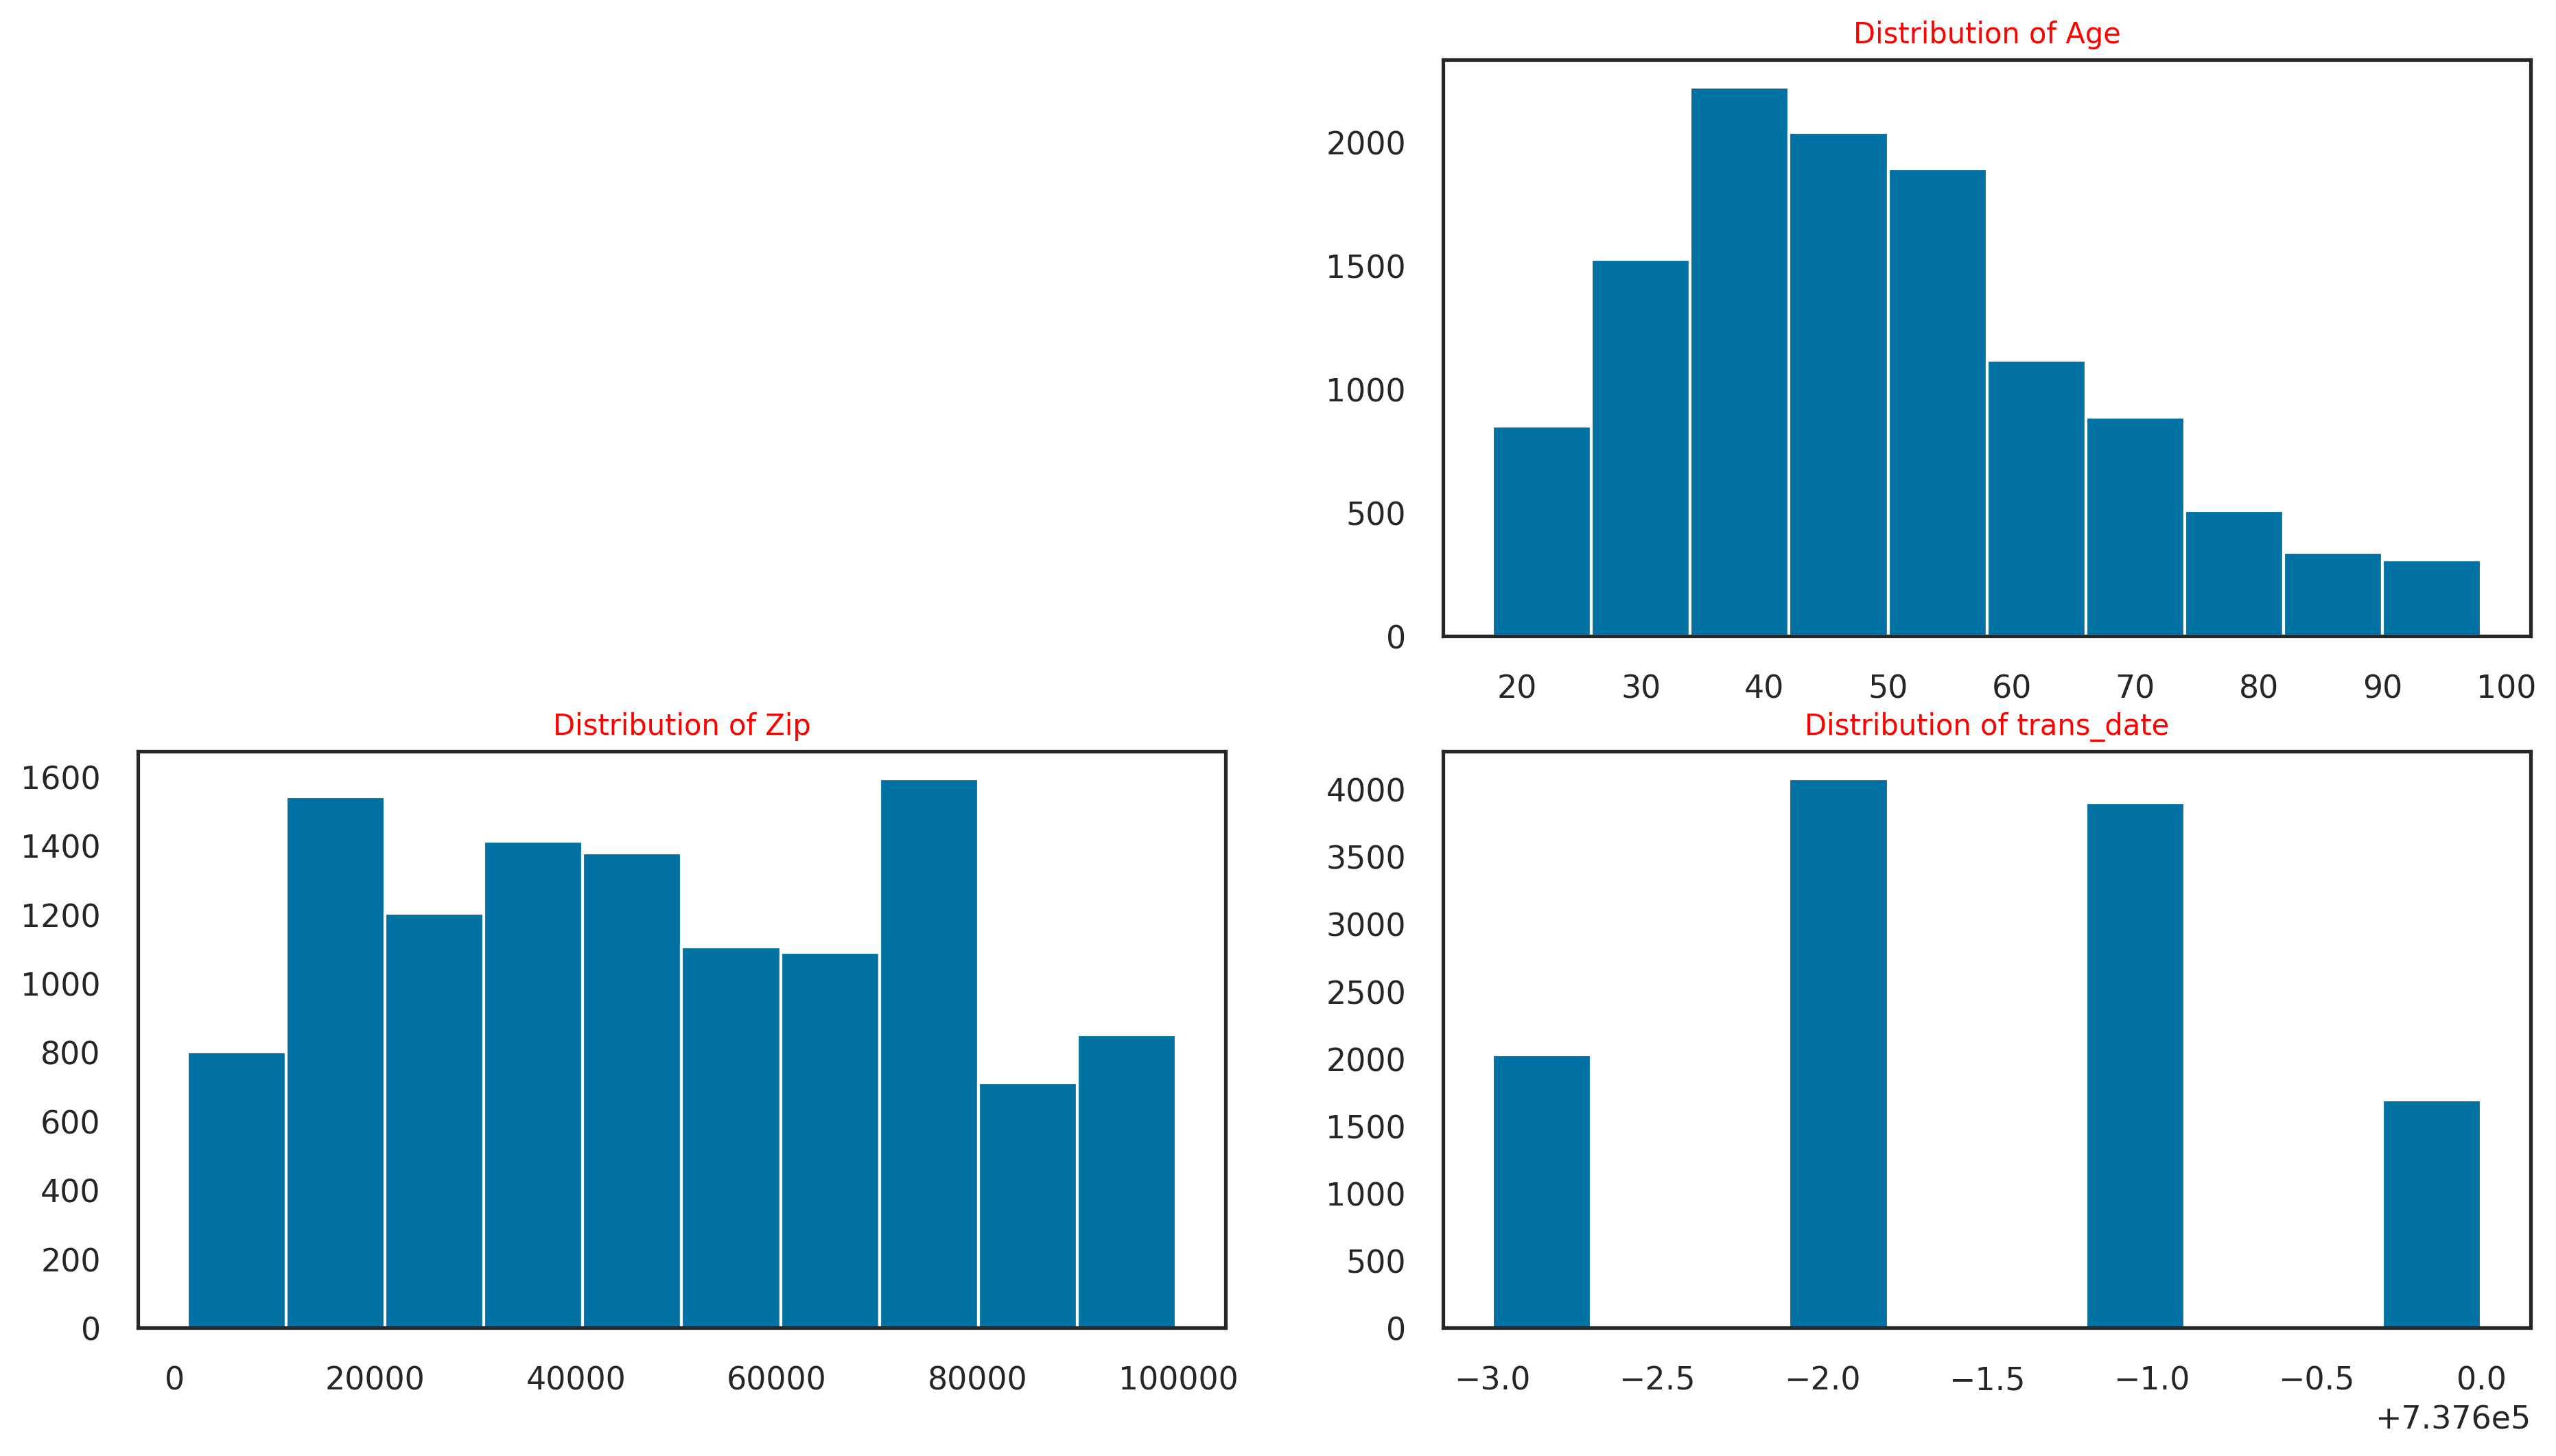

In [136]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.trans_date)
plt.show()

In [137]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [138]:
# Scaling
X = scaler.fit_transform(X)



In [142]:
import numpy as np
from sklearn.model_selection import train_test_split

# Handle missing values in the target variable
y = y.replace(np.nan, 0)  # Replace NaNs with 0 or any other suitable value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Print the shape of the training and testing sets
print('X_train shape: {}\ny_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_test shape: {}\ny_test shape: {}'.format(X_test.shape, y_test.shape))


X_train shape: (9357, 15)
y_train shape: (9357,)
X_test shape: (2340, 15)
y_test shape: (2340,)


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose an appropriate strategy

# Handle missing values in the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the Decision Tree classifier
dcstree = DecisionTreeClassifier(random_state=42)
dcstree.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = dcstree.predict(X_test_imputed)




<Axes: >

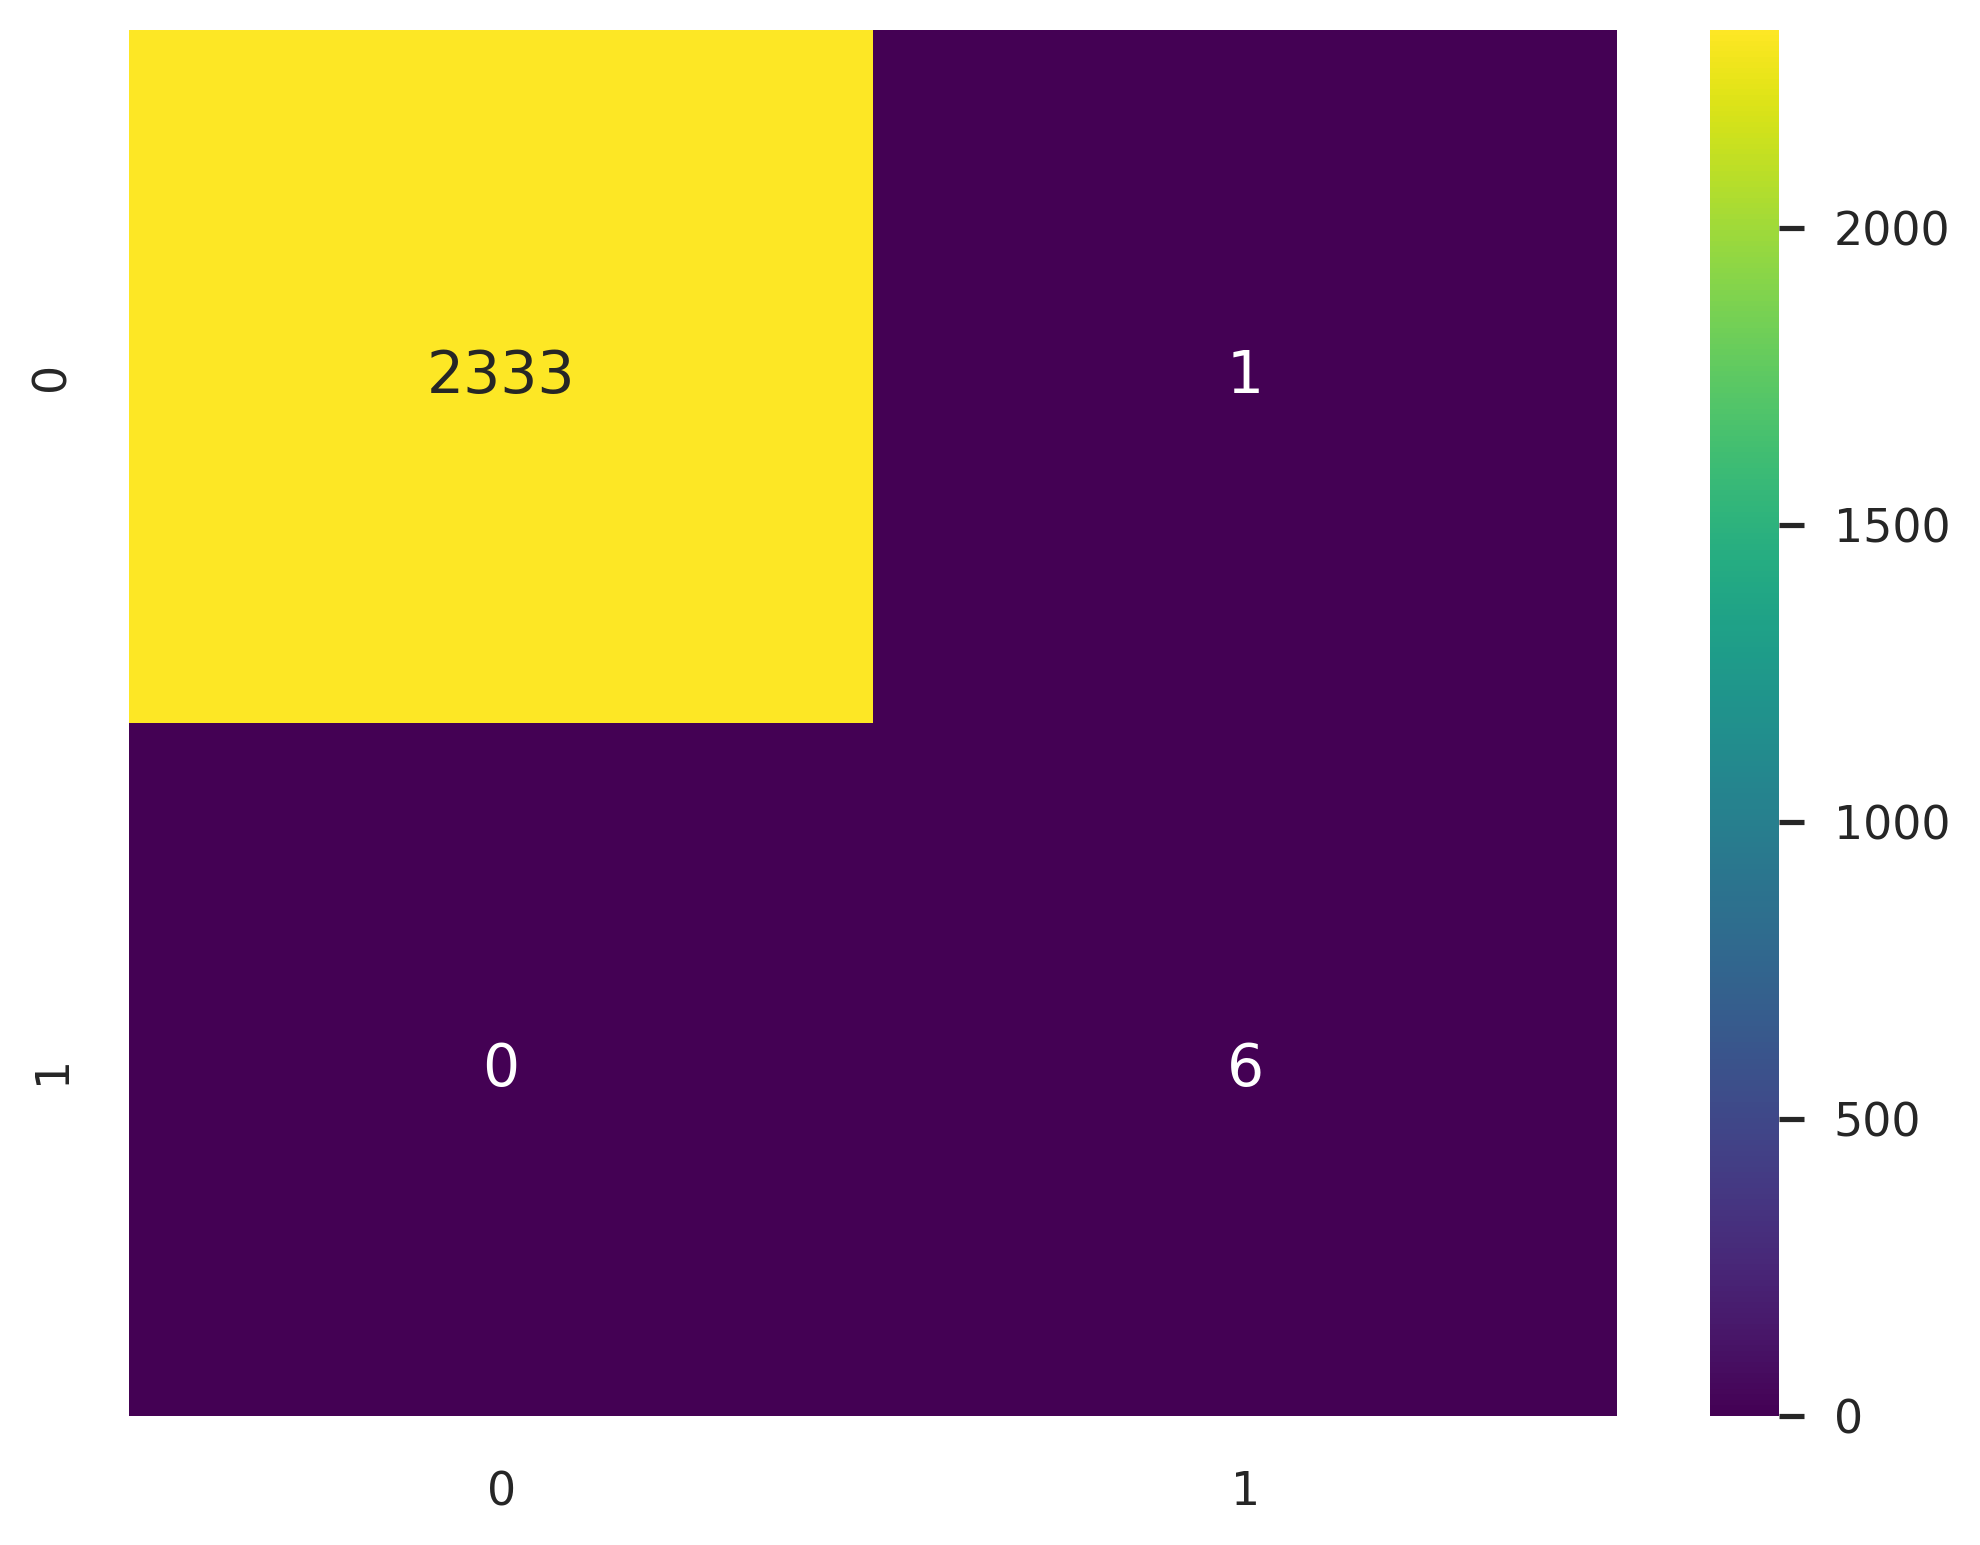

In [154]:
fig = plt.figure(figsize=(8,6))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2334
         1.0       0.86      1.00      0.92         6

    accuracy                           1.00      2340
   macro avg       0.93      1.00      0.96      2340
weighted avg       1.00      1.00      1.00      2340



With DecisionTree we have F1-Score = **0.92** for label 1

**SMOTE**

In [156]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({0.0: 9334, 1.0: 23})


In [158]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from collections import Counter

# Create an instance of SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose an appropriate strategy

# Handle missing values in the training data
X_train_imputed = imputer.fit_transform(X_train.astype('float'))

# Apply SMOTE
smote = SMOTE(sampling_strategy={1: 48050}, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0.0: 9334, 1.0: 23})
After SMOTE: Counter({1.0: 48050, 0.0: 9334})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning:

After over-sampling, the number of samples (48050) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 9334)



In [159]:
class test_model:
    from sklearn.metrics import classification_report
    def __init__(self):
        self.metrics = ['prfs','auc','acc']

    def fit_predict(model, X_train, X_test, y_train, y_test):
        model = model
        model.fit(X_train, y_train) #Fit data to model
        y_pred = model.predict(X_test)
        return y_pred

    def evaluate(y_pred, metrics):
        results = {}
        for metric in metrics:
            if metric == 'prfs':
                prfs = classification_report(y_test, y_pred)
                results['prfs'] = prfs
            elif metric =='auc':
                auc_score = roc_auc_score(y_test, y_pred)
                results['auc'] = auc_score
            elif metric =='acc':
                results['acc'] = accuracy_score(y_test, y_pred)
            else:
                print('Not available metric!')
        return results

In [160]:
from sklearn.ensemble import RandomForestClassifier

# Specify your metric here
metrics = ['prfs']
print("=====================SMOTE=====================")
RDForest_eval = test_model.evaluate(y_pred=test_model.fit_predict(RandomForestClassifier(random_state=42),
                                                                  X_train_smote,
                                                                  X_test,
                                                                  y_train_smote,
                                                                  y_test
                                                                 ),
                                    metrics=metrics
                                    )

print("Random Forest model evaluate:\n", RDForest_eval['prfs'])

=====================SMOTE=====================
Random Forest model evaluate:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2334
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340



With RandomForestClassifier we have better **F1-Score = 1.0** for label 1.

Try tuning some important Hyperparameters for RDF

In [161]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)

{'n_estimators': [100, 133, 166, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [162]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, greater_is_better=True, pos_label=1)

The best estimator on randomized_search:  
RandomForestClassifier(max_features='sqrt', n_estimators=200)

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Create an instance of SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose an appropriate strategy

# Handle missing values in the training data
X_train_imputed = imputer.fit_transform(X_train)

# Handle missing values in the test data
X_test_imputed = imputer.transform(X_test)

# Create and fit the Random Forest classifier
rf_random = RandomForestClassifier(max_features='sqrt', n_estimators=200, random_state=41)
rf_random.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = rf_random.predict(X_test_imputed)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2334
         1.0       1.00      0.50      0.67         6

    accuracy                           1.00      2340
   macro avg       1.00      0.75      0.83      2340
weighted avg       1.00      1.00      1.00      2340



After tuning, we have **F1-Score = 0.67** for label 1, which is actually good.

